In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("sources.csv",sep =';',encoding = 'latin')
df

id_kompass_facture id_kompass_livre famille produit_code_2  \
0                     205              205     PUB            PUB   
1                     205              205     PUB            PUB   
2                     205              205     PUB            PUB   
3                     205              205     PUB            PUB   
4                     205              205     PUB            PUB   
...                   ...              ...     ...            ...   
138692            9903871          9903871     PUB            PUB   
138693            9903881          9903881      MD         DIVERS   
138694            9903927          9903927      MD          EMAIL   
138695            9903927          9903927      MD       LOCATION   
138696            9903927          9903927      MD         DIVERS   

       produit_code_3       produit                  produit_code_5  \
0              FRANCE           NaN                             NaN   
1               MONDE       MOT_CLE                             NaN   
2               MONDE          LOGO                             NaN   
3               MONDE           NaN                             NaN   
4               MONDE           NaN                             NaN   
...               ...           ...                             ...   
138692          MONDE       WEBCAMP                             NaN   
138693         FRANCE        AUTRES                             NaN   
138694          MONDE  BASE_KOMPASS  EMAIL_TELELISTE/AVEC_DIFFUSION   
138695         FRANCE           NaN                             NaN   
138696         FRANCE        AUTRES                             NaN   

       produit_code_6 duree_produit reference_article  \
0                 NaN       12 mois           A278441   
1                 NaN       12 mois           A278441   
2                 NaN       12 mois           A278441   
3                 NaN       12 mois           A278441   
4                 NaN       12 mois           A278441   
...               ...           ...               ...   
138692            NaN       12 mois           A318425   
138693            NaN       12 mois           R320307   
138694       < 10 000       12 mois           A324642   
138695            NaN       12 mois           A324642   
138696            NaN       12 mois           A324642   

                                      description_article date_de_facturation  \
0                  Inscription aux services appels offres          30/01/2012   
1                                               Mot cl            30/01/2012   
2                                           Logo Internet          30/01/2012   
3                                 Valorisation Internet            30/01/2012   
4                                  Valorisation   sur DVD          30/01/2012   
...                                                   ...                 ...   
138692                    Pav liste de rsultats 12 mois          22/01/2014   
138693           Prestations diverses de marketing direct          06/03/2014   
138694  Location emails Kompass - Couplage avec diffusion          25/06/2014   
138695  Emailing Kompass 1 repasse offerte sous 30 jours           25/06/2014   
138696           Prestations diverses de marketing direct          25/06/2014   

        mois_de_facturation  campagne  annee_de_facturation dans_un_pack  \
0                         1    2012.0                  2012          Non   
1                         1    2012.0                  2012          Non   
2                         1    2012.0                  2012          Non   
3                         1    2012.0                  2012          Non   
4                         1    2012.0                  2012          Non   
...                     ...       ...                   ...          ...   
138692                    1    2014.0                  2014          Non   
138693                    3    2013.0                  2014

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138697 entries, 0 to 138696
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id_kompass_facture                  138697 non-null  object 
 1   id_kompass_livre                    138697 non-null  object 
 2   famille                             138697 non-null  object 
 3   produit_code_2                      138697 non-null  object 
 4   produit_code_3                      127322 non-null  object 
 5   produit                             86154 non-null   object 
 6   produit_code_5                      10608 non-null   object 
 7   produit_code_6                      6706 non-null    object 
 8   duree_produit                       138697 non-null  object 
 9   reference_article                   138697 non-null  object 
 10  description_article                 138697 non-null  object 
 11  date_de_facturation       

In [4]:
colonnes_a_convertir = ["quantite_de_l'article", "valeur_de_l'article", "valeur_du_contrat", "montant_du_panier_annuel_du_client", 'ca_avec_remise', 'ca_sans_remise']

# Conversion des valeurs des colonnes spécifiées en float
for col in colonnes_a_convertir:
    df[col] = df[col].replace('[,]', '.', regex=True).astype(float)

#-------------------------------------------------------------------------------------------

df = df[~df['campagne'].isin([np.nan, 2010, 2011])]

#-------------------------------------------------------------------------------------------

df['date_de_facturation'] = pd.to_datetime(df['date_de_facturation'], errors='coerce')
df['year_month'] = df['date_de_facturation'].dt.to_period('M')
# Convertir 'year_month' en chaîne de caractères
df['year_month'] = df['year_month'].astype(str)

#-------------------------------------------------------------------------------------------

def format_number(number):
    return f'{number:,}'.replace(',', ' ')

#-------------------------------------------------------------------------------------------

# Créer une nouvelle colonne combinée pour les modalités de famille et produit_code_2
df['famille_produit_code_2'] = df['famille'] + " - " + df['produit_code_2']

#-------------------------------------------------------------------------------------------

df['agence'] = pd.to_numeric(df['agence'], errors='coerce').astype('float64')
df['agence'] = df['agence'].astype('string')


In [5]:
df.isnull().sum()

id_kompass_facture                         0
id_kompass_livre                           0
famille                                    0
produit_code_2                             0
produit_code_3                         11350
produit                                52354
produit_code_5                        127818
produit_code_6                        131716
duree_produit                              0
reference_article                          0
description_article                        0
date_de_facturation                        0
mois_de_facturation                        0
campagne                                   0
annee_de_facturation                       0
dans_un_pack                               0
trimestre                                  0
order_tran_codes_3                         0
type_de_contrat                            0
annee_de_contrat                           0
denonce_kompass                            0
denonce_client                             0
renouvelle

In [6]:
frequence_duree_produit = df["denonce_client"].value_counts()
print(frequence_duree_produit)

denonce_client
NON    105280
OUI     33135
Name: count, dtype: int64


In [7]:
for col in df.columns:
    print(f'{col:-<50}{df[col].nunique()} éléments uniques')

id_kompass_facture--------------------------------12402 éléments uniques
id_kompass_livre----------------------------------12879 éléments uniques
famille-------------------------------------------5 éléments uniques
produit_code_2------------------------------------26 éléments uniques
produit_code_3------------------------------------5 éléments uniques
produit-------------------------------------------50 éléments uniques
produit_code_5------------------------------------30 éléments uniques
produit_code_6------------------------------------13 éléments uniques
duree_produit-------------------------------------14 éléments uniques
reference_article---------------------------------21323 éléments uniques
description_article-------------------------------579 éléments uniques
date_de_facturation-------------------------------292 éléments uniques
mois_de_facturation-------------------------------12 éléments uniques
campagne------------------------------------------3 éléments uniques
annee_de_fac

# AXE : NOMBRE DE SERVICE (id_kompass_facture)

### Chiffre d'affaire

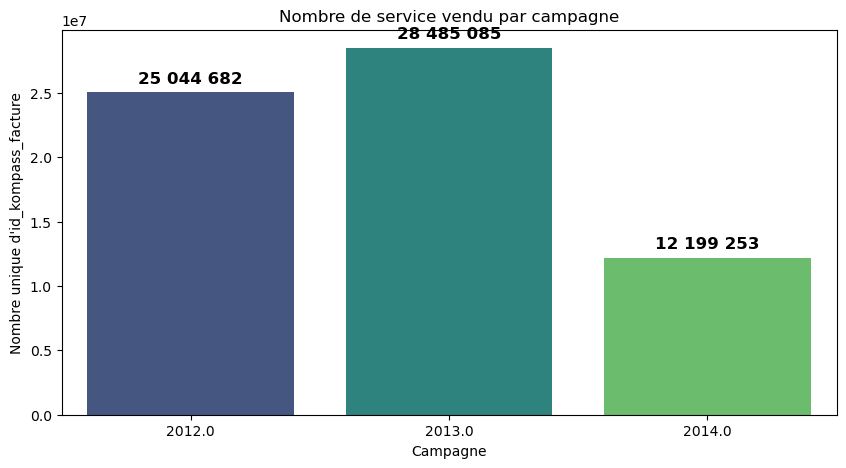

In [8]:
# Groupby sur la colonne "campagne" et calcul du nombre unique de "id_kompass_facture"
df_grouped = df.groupby('campagne')['ca_avec_remise'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped.columns = ['campagne', 'Chiffre d\'affaire']

# Création du graphique avec les chiffres au-dessus de chaque barre
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='campagne', y='Chiffre d\'affaire', data=df_grouped, palette='viridis')

plt.title('Nombre de service vendu par campagne')
plt.xlabel('Campagne')
plt.ylabel('Nombre unique d\'id_kompass_facture')

# Ajouter les chiffres au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format_number(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.show()

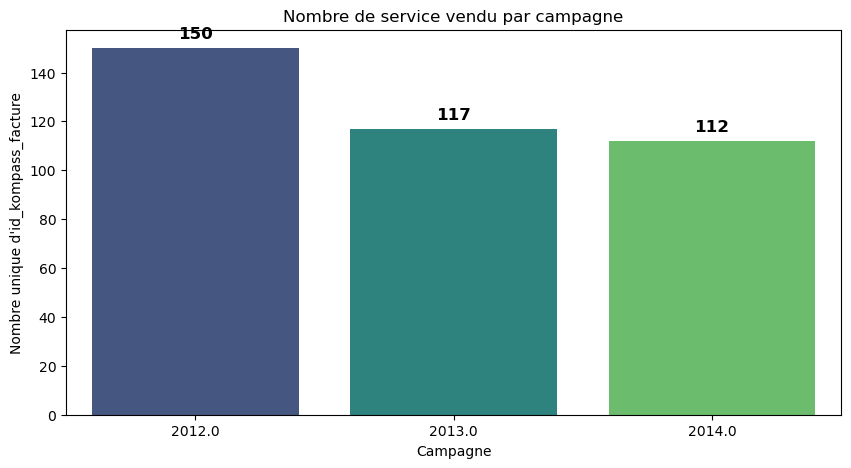

In [42]:
# Groupby sur la colonne "campagne" et calcul du nombre unique de "id_kompass_facture"
df_grouped = df.groupby('campagne')['vendeur'].nunique().reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped.columns = ['campagne', 'nombre']

# Création du graphique avec les chiffres au-dessus de chaque barre
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='campagne', y='nombre', data=df_grouped, palette='viridis')

plt.title('Nombre de service vendu par campagne')
plt.xlabel('Campagne')
plt.ylabel('Nombre unique d\'id_kompass_facture')

# Ajouter les chiffres au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format_number(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.show()

### Le nombre de service vendu par campagne (annee)

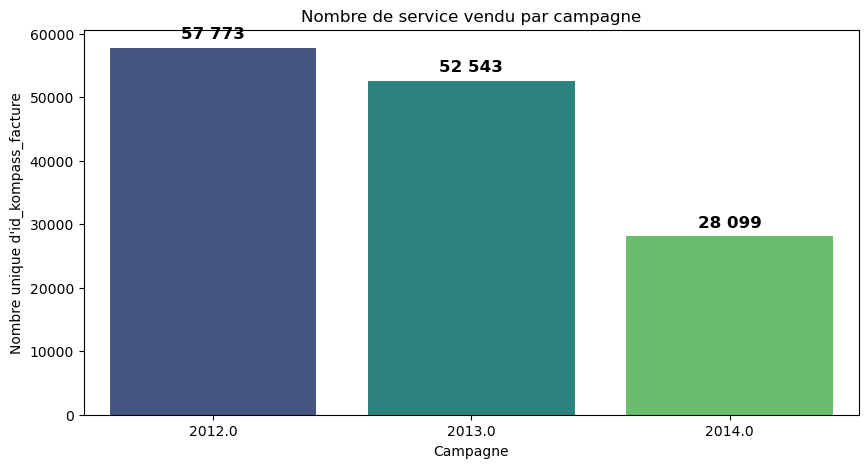

In [9]:
# Groupby sur la colonne "campagne" et calcul du nombre unique de "id_kompass_facture"
df_grouped = df.groupby('campagne')['id_kompass_facture'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped.columns = ['campagne', 'nombre_unique_id_kompass_facture']

# Création du graphique avec les chiffres au-dessus de chaque barre
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='campagne', y='nombre_unique_id_kompass_facture', data=df_grouped, palette='viridis')

plt.title('Nombre de service vendu par campagne')
plt.xlabel('Campagne')
plt.ylabel('Nombre unique d\'id_kompass_facture')

# Ajouter les chiffres au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format_number(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.show()

### Le nombre de service vendu par mois

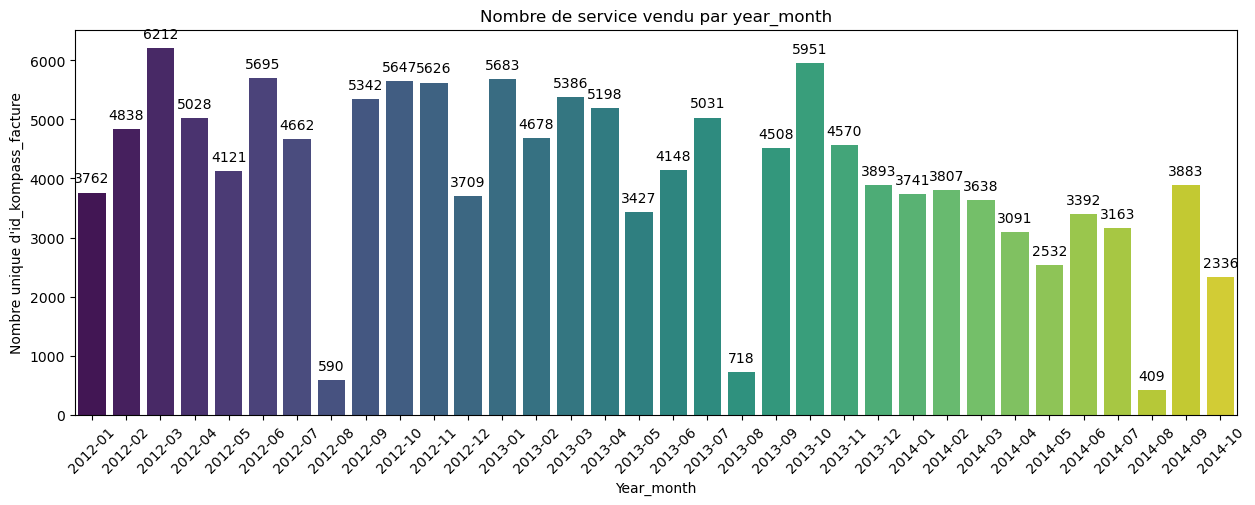

In [10]:
# Groupby sur la colonne "year_month" et calcul du nombre unique de "id_kompass_facture"
df_grouped = df.groupby('year_month')['id_kompass_facture'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped.columns = ['year_month', 'nombre_unique_id_kompass_facture']

# Création du graphique avec les chiffres au-dessus de chaque barre
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='year_month', y='nombre_unique_id_kompass_facture', data=df_grouped, palette='viridis')

plt.title('Nombre de service vendu par year_month')
plt.xlabel('Year_month')
plt.xticks(rotation=45)
plt.ylabel('Nombre unique d\'id_kompass_facture')

# Ajouter les chiffres au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

# AXE : TYPE DE CONTRAT (type_de_contrat)

### Le nombre client par type de contrat sur les diferentes annees (type_de_contrat X campagne X id_kompass_facture)

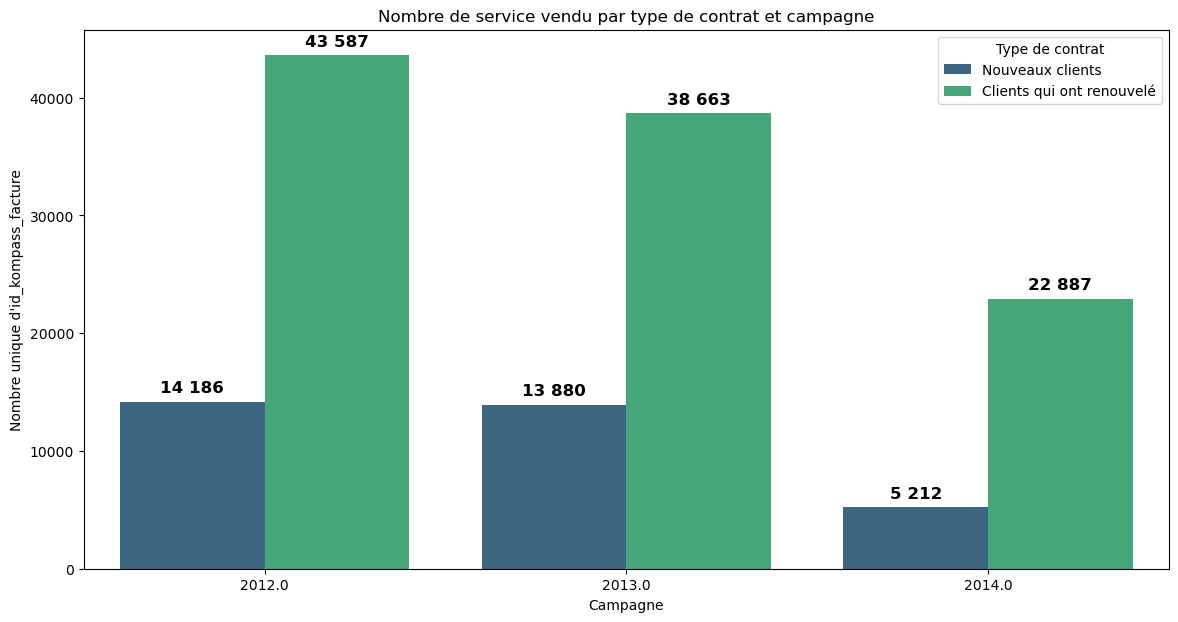

In [11]:
# Filtrer les données pour chaque type de contrat
df_nvx = df[df['type_de_contrat'] == 'NVX']
df_rnt = df[df['type_de_contrat'] == 'RNT']

# Groupby sur la colonne "campagne" et calcul du nombre unique de "id_kompass_facture" pour chaque type de contrat
df_nvx_grouped = df_nvx.groupby('campagne')['id_kompass_facture'].count().reset_index()
df_rnt_grouped = df_rnt.groupby('campagne')['id_kompass_facture'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_nvx_grouped.columns = ['campagne', 'nombre_unique_id_kompass_facture_nvx']
df_rnt_grouped.columns = ['campagne', 'nombre_unique_id_kompass_facture_rnt']

# Fusionner les deux DataFrames sur la colonne "campagne"
df_combined = df_nvx_grouped.merge(df_rnt_grouped, on='campagne', how='outer').fillna(0)

# Transformer les données pour un format long
df_melted = pd.melt(df_combined, id_vars='campagne', 
                    value_vars=['nombre_unique_id_kompass_facture_nvx', 'nombre_unique_id_kompass_facture_rnt'],
                    var_name='type_de_contrat', value_name='nombre_unique_id_kompass_facture')

# Remplacer les noms des modalités pour plus de clarté
df_melted['type_de_contrat'] = df_melted['type_de_contrat'].replace({
    'nombre_unique_id_kompass_facture_nvx': 'Nouveaux clients',
    'nombre_unique_id_kompass_facture_rnt': 'Clients qui ont renouvelé'
})

# Création du graphique avec les barres côte à côte
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='campagne', y='nombre_unique_id_kompass_facture', hue='type_de_contrat', data=df_melted, palette='viridis')

plt.title('Nombre de service vendu par type de contrat et campagne')
plt.xlabel('Campagne')
plt.ylabel('Nombre unique d\'id_kompass_facture')

# Ajouter les chiffres au-dessus de chaque barre
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Ajouter seulement si la hauteur est positive
        ax.annotate(format_number(int(height)), 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', 
                    fontsize=12, fontweight='bold')

plt.legend(title='Type de contrat')
plt.show()


### Le nombre service par type de contrat sur les diferentes annees de chaque Agence (type_de_contrat --X-- campagne --X-- id_kompass_facture)

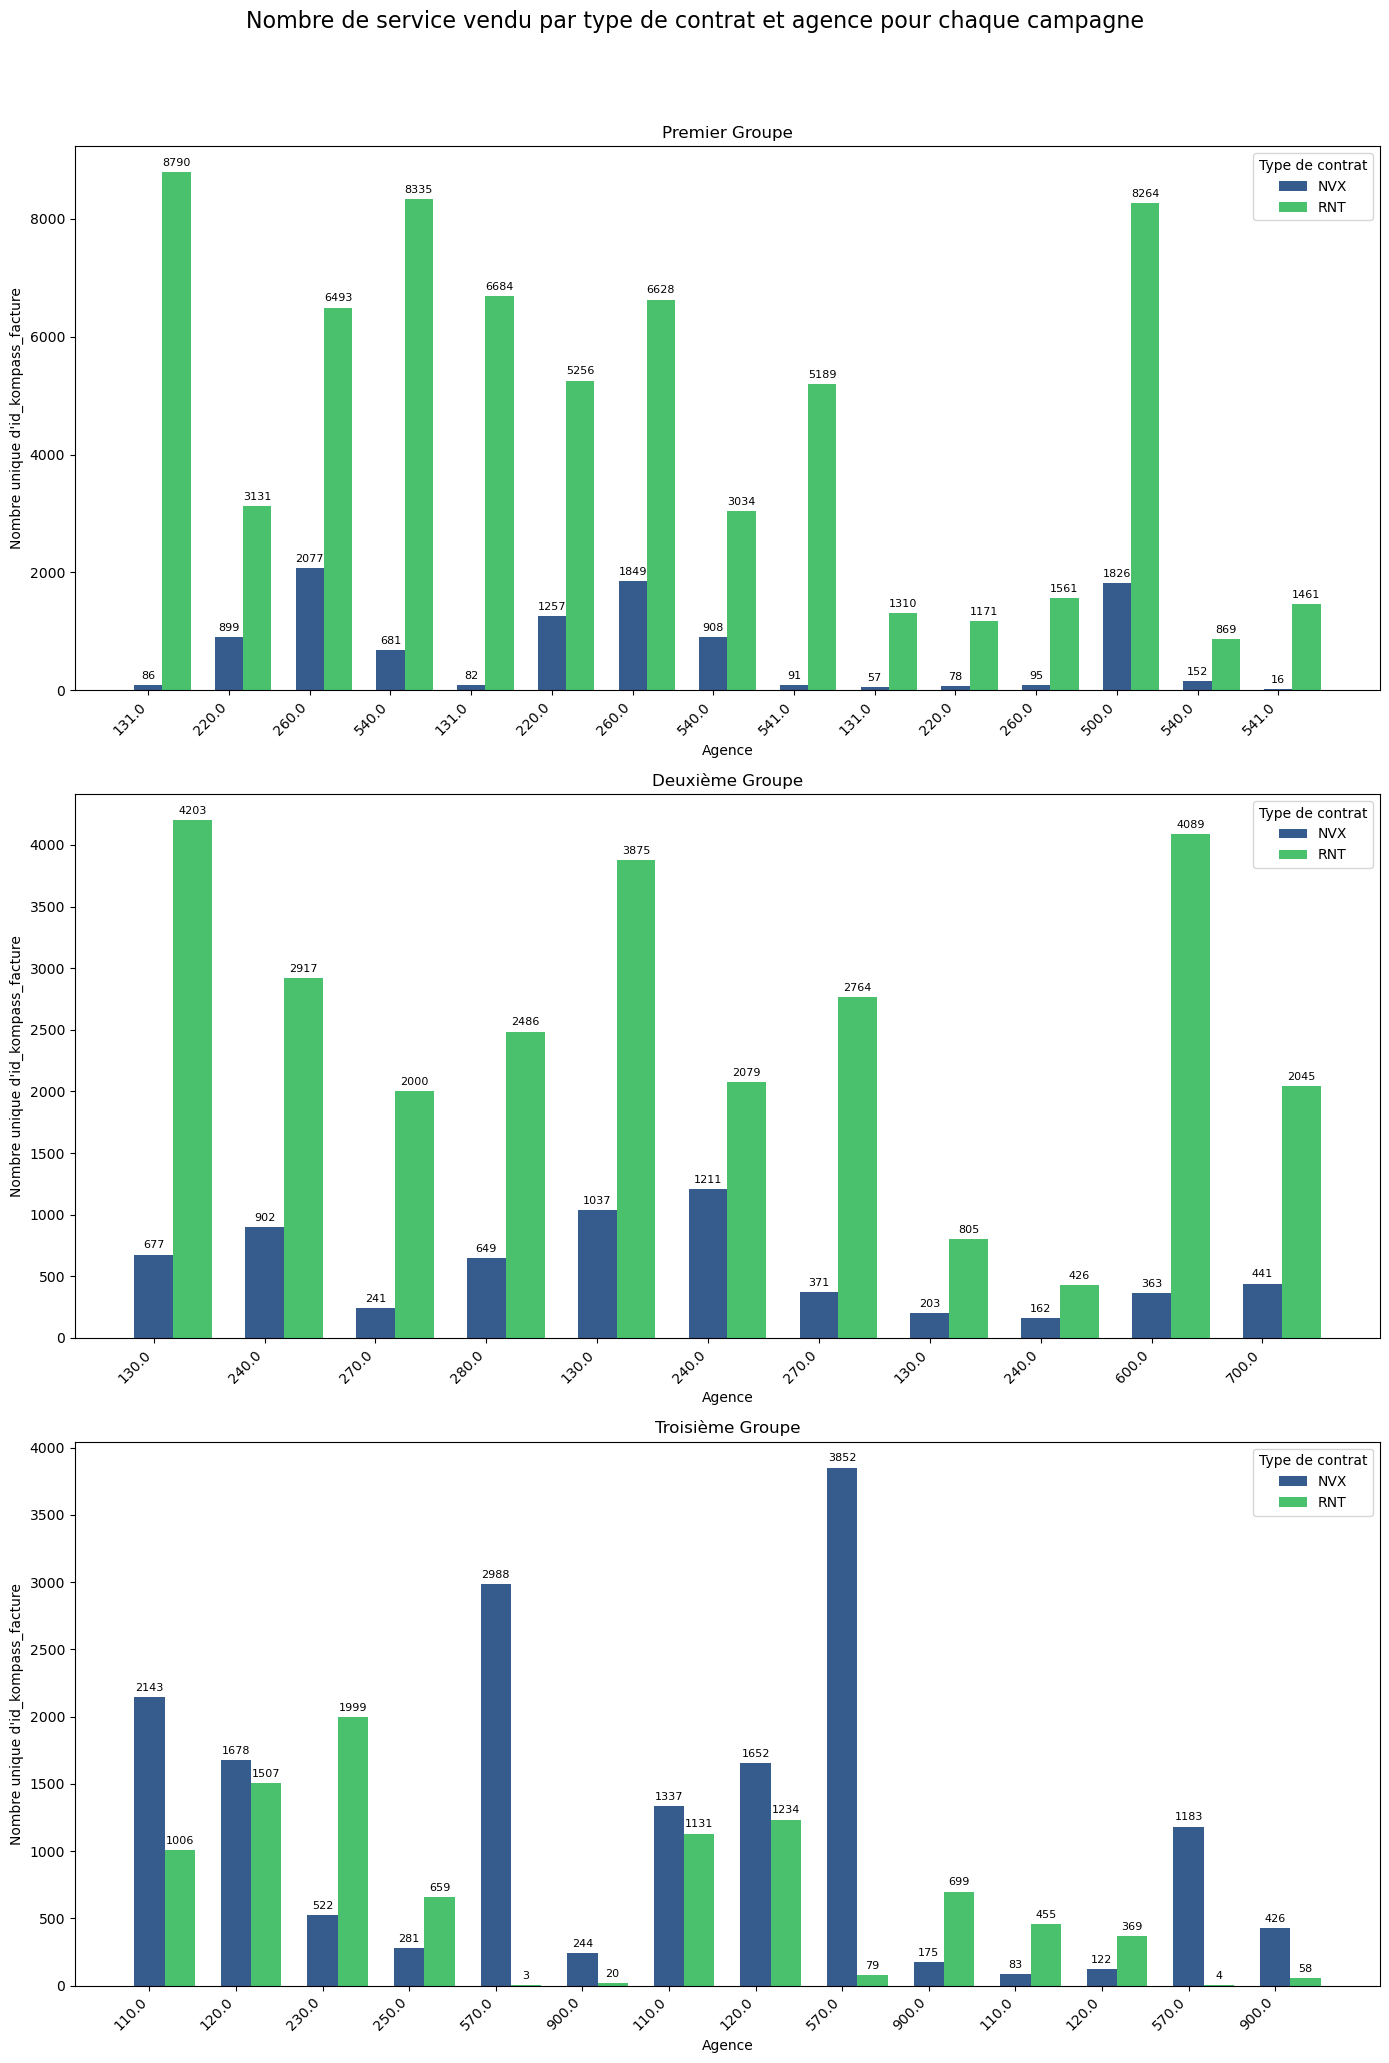

In [12]:
# Filtrer les données pour chaque type de contrat
df_nvx = df[df['type_de_contrat'] == 'NVX']
df_rnt = df[df['type_de_contrat'] == 'RNT']

# Groupby sur les colonnes "campagne" et "agence" et calcul du nombre unique de "id_kompass_facture" pour chaque type de contrat
df_nvx_grouped = df_nvx.groupby(['campagne', 'agence'])['id_kompass_facture'].count().reset_index()
df_rnt_grouped = df_rnt.groupby(['campagne', 'agence'])['id_kompass_facture'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_nvx_grouped.columns = ['campagne', 'agence', 'nombre_unique_id_kompass_facture_nvx']
df_rnt_grouped.columns = ['campagne', 'agence', 'nombre_unique_id_kompass_facture_rnt']

# Fusionner les deux DataFrames sur les colonnes "campagne" et "agence"
df_combined = df_nvx_grouped.merge(df_rnt_grouped, on=['campagne', 'agence'], how='outer').fillna(0)

# Obtenir le nombre total d'agences
total_agences = len(df_combined['agence'].unique())

# Calculer le nombre d'agences dans chaque groupe
nb_agences_par_groupe = total_agences // 3

# Trier les données en fonction de la colonne 'nombre_unique_id_kompass_facture_rnt'
df_combined_sorted = df_combined.sort_values(by='nombre_unique_id_kompass_facture_rnt', ascending=False)

# Diviser les agences en trois groupes
agences_uniques = df_combined_sorted['agence'].unique()
agences_groupe_1 = agences_uniques[:nb_agences_par_groupe]
agences_groupe_2 = agences_uniques[nb_agences_par_groupe:2*nb_agences_par_groupe]
agences_groupe_3 = agences_uniques[2*nb_agences_par_groupe:]

# Filtrer les données pour chaque groupe d'agences
df_groupe_1 = df_combined[df_combined['agence'].isin(agences_groupe_1)]
df_groupe_2 = df_combined[df_combined['agence'].isin(agences_groupe_2)]
df_groupe_3 = df_combined[df_combined['agence'].isin(agences_groupe_3)]

# Créer une figure avec trois lignes
fig, axs = plt.subplots(3, 1, figsize=(14, 21))

for ax, data, title in zip(axs, [df_groupe_1, df_groupe_2, df_groupe_3], ['Premier Groupe', 'Deuxième Groupe', 'Troisième Groupe']):
    # Définir la plage de données pour ce groupe
    data_nvx = data['nombre_unique_id_kompass_facture_nvx']
    data_rnt = data['nombre_unique_id_kompass_facture_rnt']
    
    # Définir la position des barres
    positions_nvx = np.arange(len(data))
    positions_rnt = [pos + 0.35 for pos in positions_nvx]
    
    # Tracer les barres pour chaque type de contrat
    rects1 = ax.bar(positions_nvx, data_nvx, width=0.35, label='NVX', color=sns.color_palette("viridis")[1])
    rects2 = ax.bar(positions_rnt, data_rnt, width=0.35, label='RNT', color=sns.color_palette("viridis")[4])
    
    # Ajouter les nombres au-dessus de chaque barre
    for rect in rects1:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=8)
    for rect in rects2:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=8)
    
    # Définir les étiquettes des agences sur l'axe x
    ax.set_xticks(np.arange(len(data)))
    ax.set_xticklabels(data['agence'], rotation=45, ha='right')
    
    # Ajouter le titre et les légendes
    ax.set_title(title)
    ax.set_xlabel('Agence')
    ax.set_ylabel('Nombre unique d\'id_kompass_facture')
    ax.legend(title='Type de contrat')

# Ajouter un titre global à la figure
fig.suptitle('Nombre de service vendu par type de contrat et agence pour chaque campagne', fontsize=16)

# Ajuster automatiquement les marges
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Afficher le graphique
plt.show()


In [13]:
df_570 = df[df["agence"] == "570.0"]

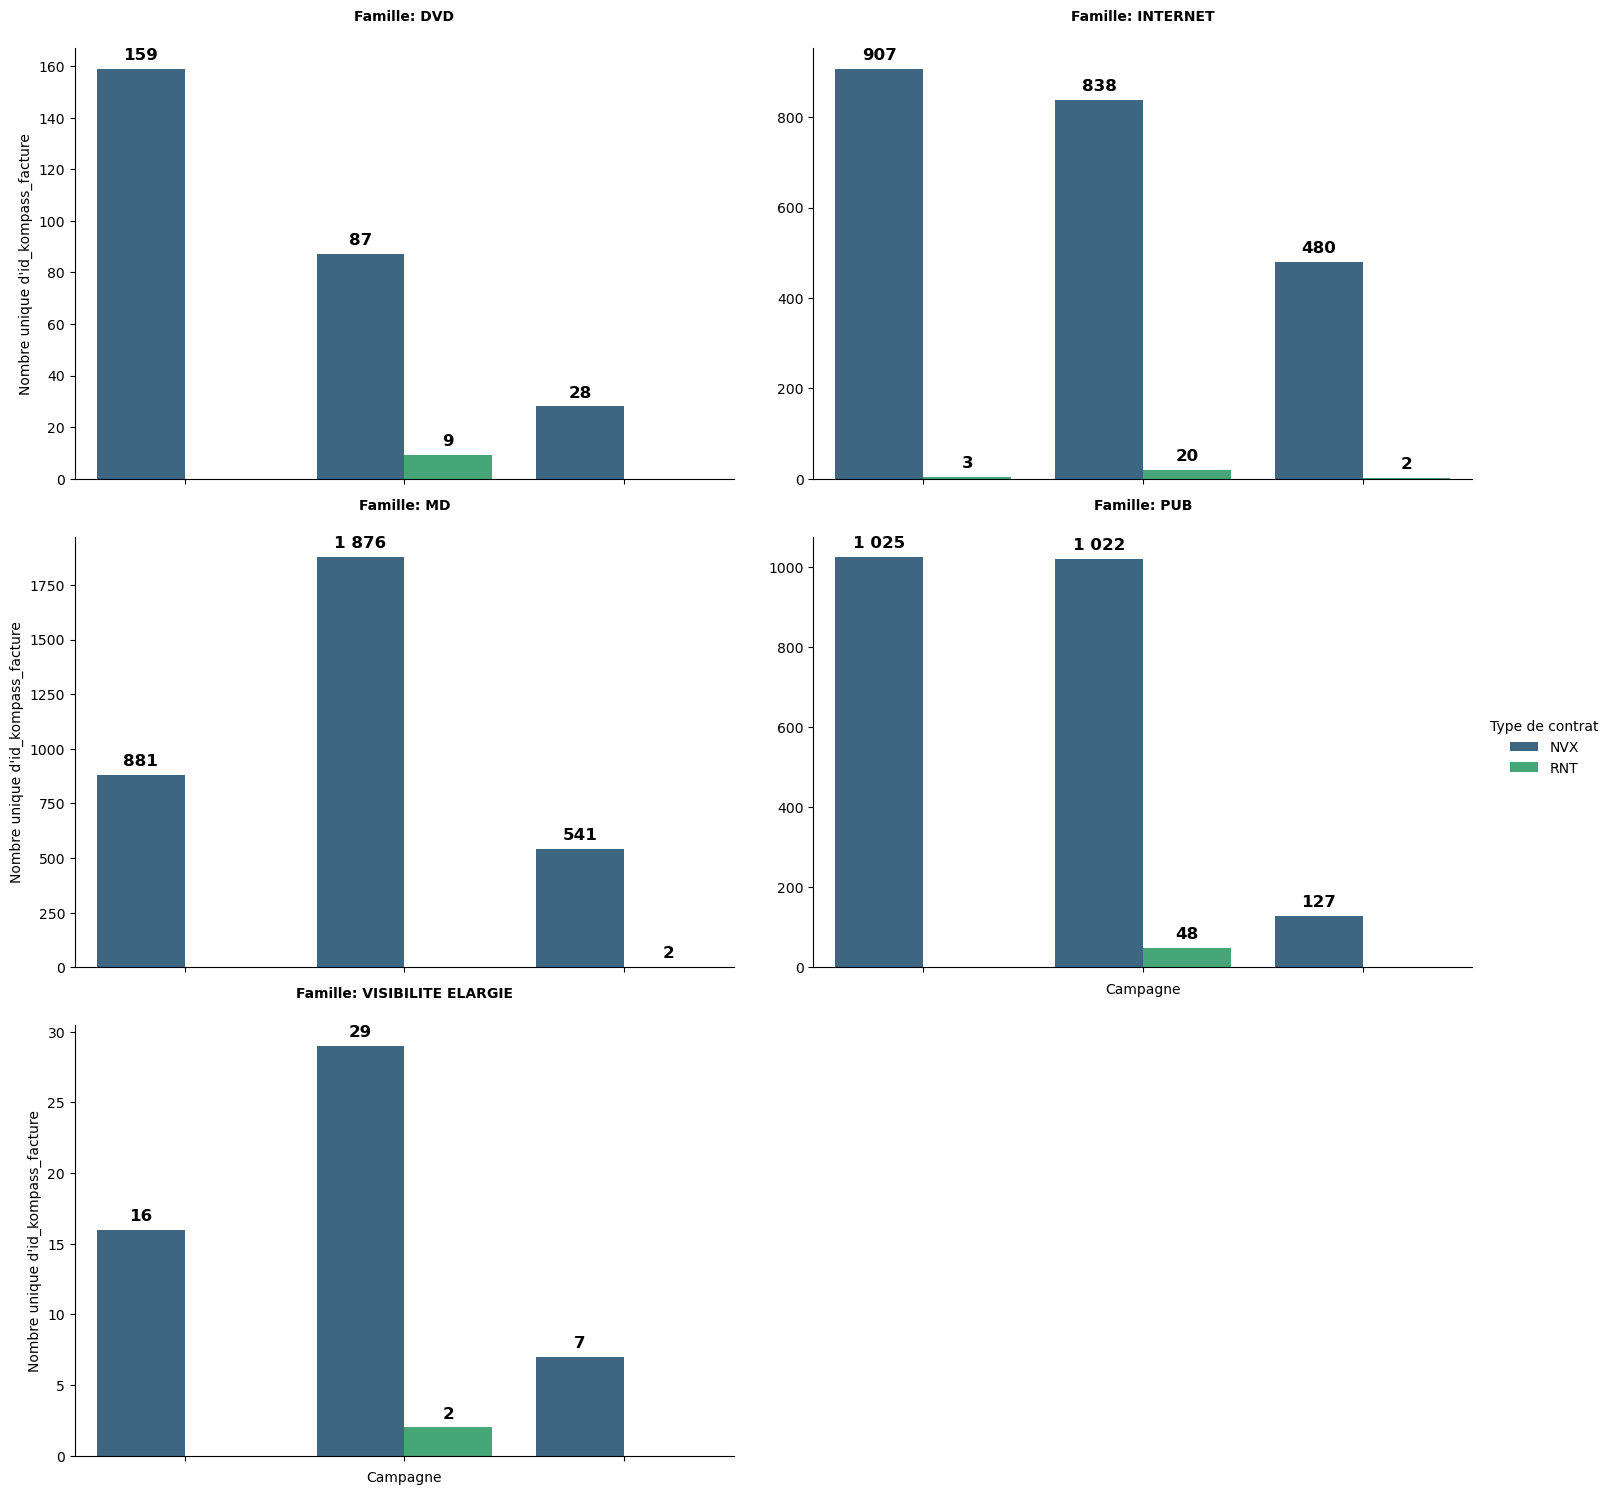

In [14]:
# Supposons que 'famille' soit une colonne de votre DataFrame
# Groupby sur les colonnes "campagne", "famille" et "type_de_contrat" et calcul du nombre unique de "id_kompass_facture"
df_grouped = df_570.groupby(['campagne', 'famille', 'type_de_contrat'])['id_kompass_facture'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped.columns = ['campagne', 'famille', 'type_de_contrat', 'nombre_unique_id_kompass_facture']

# Pivot des données pour avoir des colonnes séparées pour 'NVX' et 'RNT'
df_pivot = df_grouped.pivot_table(index=['campagne', 'famille'], columns='type_de_contrat', values='nombre_unique_id_kompass_facture', fill_value=0).reset_index()

# Melt les données pour un format long
df_melted = pd.melt(df_pivot, id_vars=['campagne', 'famille'], value_vars=['NVX', 'RNT'], var_name='type_de_contrat', value_name='nombre_unique_id_kompass_facture')

# Création d'un FacetGrid
g = sns.FacetGrid(df_melted, col='famille', col_wrap=2, height=5, aspect=1.5, sharey=False)

# Définir une fonction pour créer les barres côte à côte avec une palette de couleurs personnalisée
def barplot(data, **kwargs):
    sns.barplot(x='campagne', y='nombre_unique_id_kompass_facture', hue='type_de_contrat', data=data, palette='viridis', **kwargs)

# Appliquer la fonction à chaque sous-ensemble de données
g.map_dataframe(barplot)

# Ajouter les chiffres au-dessus de chaque barre
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Ajouter seulement si la hauteur est positive
            ax.annotate(format_number(int(height)), 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', xytext=(0, 10), 
                        textcoords='offset points',
                        fontsize=12, fontweight='bold')
    # S'assurer que les années de campagne sont visibles
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Réglages supplémentaires pour améliorer l'affichage
g.set_axis_labels('Campagne', 'Nombre unique d\'id_kompass_facture')
g.set_titles('Famille: {col_name}', fontsize=27, fontweight='bold', pad=20)
g.add_legend(title='Type de contrat')

# Ajuster l'espacement entre les sous-graphes
 # Ajuster 'bottom' pour ajouter de l'espace pour les labels

plt.show()


### Le nombre de service vendu par campagne (annee) sur les diferentes famille de services

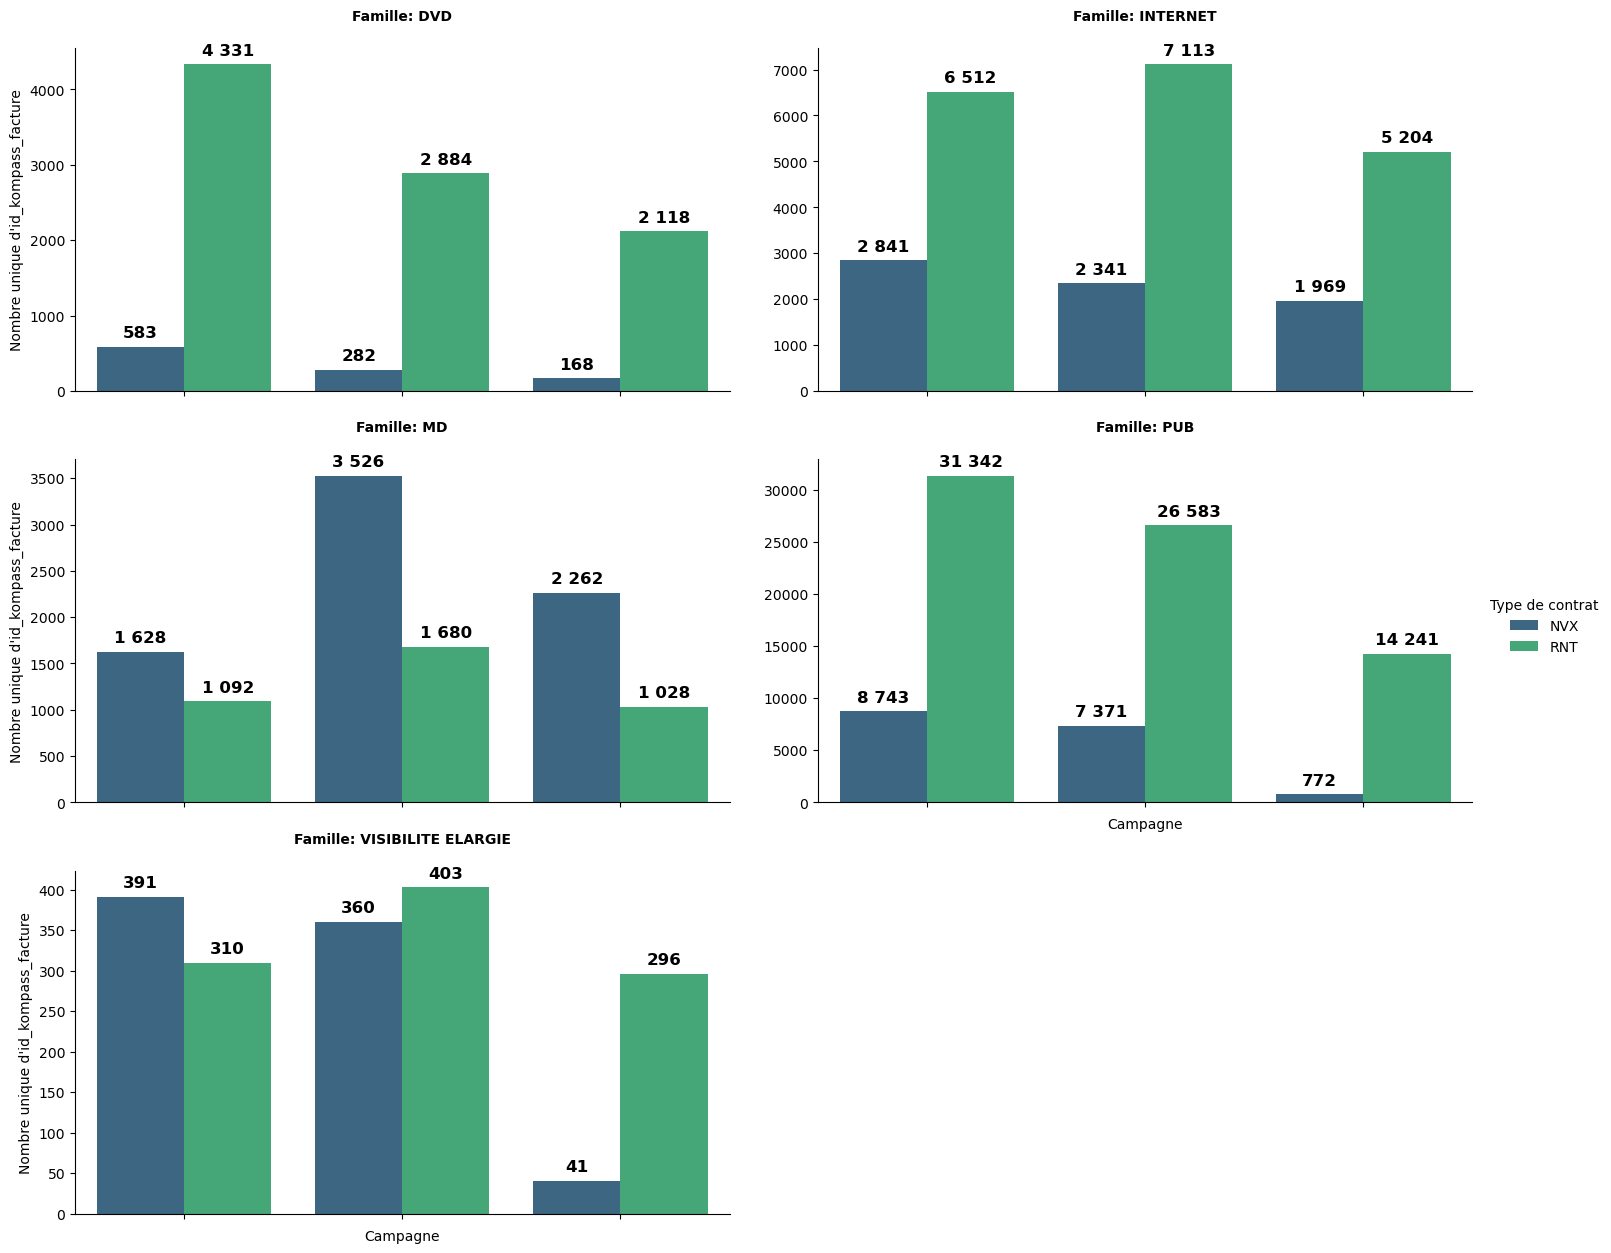

In [15]:
# Supposons que 'famille' soit une colonne de votre DataFrame
# Groupby sur les colonnes "campagne", "famille" et "type_de_contrat" et calcul du nombre unique de "id_kompass_facture"
df_grouped = df.groupby(['campagne', 'famille', 'type_de_contrat'])['id_kompass_facture'].count().reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped.columns = ['campagne', 'famille', 'type_de_contrat', 'nombre_unique_id_kompass_facture']

# Pivot des données pour avoir des colonnes séparées pour 'NVX' et 'RNT'
df_pivot = df_grouped.pivot_table(index=['campagne', 'famille'], columns='type_de_contrat', values='nombre_unique_id_kompass_facture', fill_value=0).reset_index()

# Melt les données pour un format long
df_melted = pd.melt(df_pivot, id_vars=['campagne', 'famille'], value_vars=['NVX', 'RNT'], var_name='type_de_contrat', value_name='nombre_unique_id_kompass_facture')

# Création d'un FacetGrid
g = sns.FacetGrid(df_melted, col='famille', col_wrap=2, height=5, aspect=1.5, sharey=False)

# Définir une fonction pour créer les barres côte à côte avec une palette de couleurs personnalisée
def barplot(data, **kwargs):
    sns.barplot(x='campagne', y='nombre_unique_id_kompass_facture', hue='type_de_contrat', data=data, palette='viridis', **kwargs)

# Appliquer la fonction à chaque sous-ensemble de données
g.map_dataframe(barplot)

# Ajouter les chiffres au-dessus de chaque barre
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Ajouter seulement si la hauteur est positive
            ax.annotate(format_number(int(height)), 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', xytext=(0, 10), 
                        textcoords='offset points',
                        fontsize=12, fontweight='bold')
    # S'assurer que les années de campagne sont visibles
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Réglages supplémentaires pour améliorer l'affichage
g.set_axis_labels('Campagne', 'Nombre unique d\'id_kompass_facture')
g.set_titles('Famille: {col_name}', fontsize=17, fontweight='bold', pad=20)
g.add_legend(title='Type de contrat')

# Ajuster l'espacement entre les sous-graphes
plt.subplots_adjust(hspace=0.2, bottom=0.2)  # Ajuster 'bottom' pour ajouter de l'espace pour les labels

plt.show()


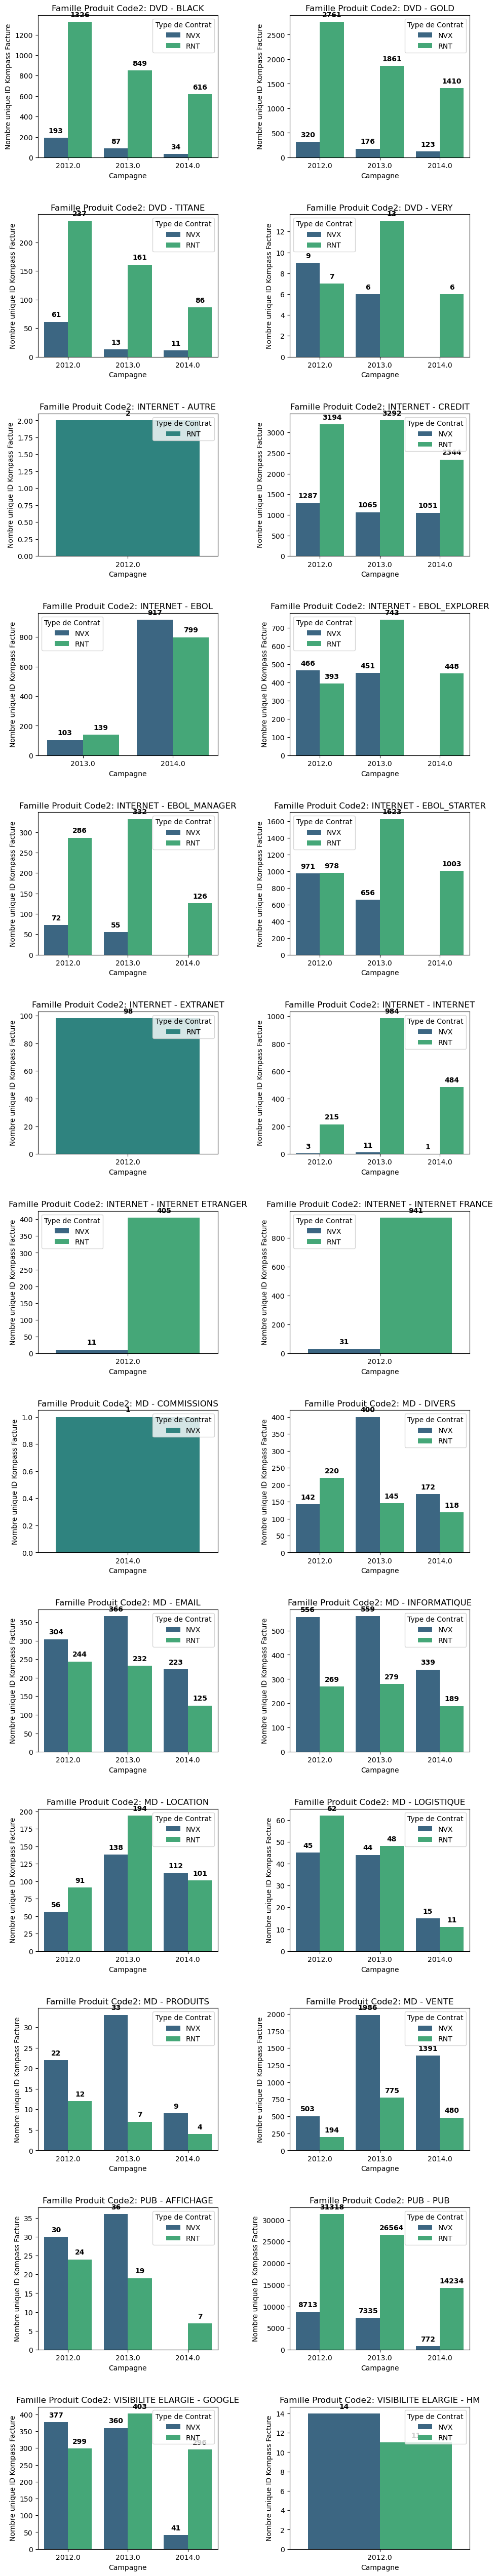

In [16]:
df_grouped = df.groupby(['campagne', 'famille_produit_code_2', 'type_de_contrat'])['id_kompass_facture'].count().reset_index()

# Rename the columns for clarity
df_grouped.columns = ['campagne', 'famille_produit_code_2', 'type_de_contrat', 'nombre_unique_id_kompass_facture']

import seaborn as sns
import matplotlib.pyplot as plt

# Déterminer le nombre de lignes et de colonnes nécessaires en fonction du nombre total de graphiques à afficher
num_plots = len(df_grouped['famille_produit_code_2'].unique())
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Calculer le nombre de lignes arrondi à l'entier supérieur

# Créer une grille de sous-graphiques
fig, axs = plt.subplots(num_rows, num_cols, figsize=(11, 5 * num_rows))

# Aplatir les axes si num_rows = 1 pour éviter les problèmes d'indexation
if num_rows == 1:
    axs = [axs]

# Créer un graphique pour chaque famille_produit_code2
for i, (famille_produit_code2, data) in enumerate(df_grouped.groupby('famille_produit_code_2')):
    ax = axs[i // num_cols, i % num_cols]  # Sélectionner l'axe correspondant
    sns.barplot(x='campagne', y='nombre_unique_id_kompass_facture', hue='type_de_contrat', data=data, ax=ax, palette='viridis')
    ax.set_title(f'Famille Produit Code2: {famille_produit_code2}')
    ax.set_xlabel('Campagne')
    ax.set_ylabel('Nombre unique ID Kompass Facture')
    ax.legend(title='Type de Contrat')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Rotation des étiquettes de l'axe des x
    ax.set_xlim(-0.5, len(data['campagne'].unique()) - 0.5)  # Ajuster les limites de l'axe des x pour une meilleure apparence
    
    # Ajouter les nombres au-dessus de chaque barre avec un padding vertical
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points', fontweight='bold')

# Utiliser tight_layout pour ajuster automatiquement les marges
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher le graphique
plt.show()



# AXE : LES SERVICES / PRODUITS (famille, produit_code_2)

### Sommes des ventes de par rapport a chaque modalite des colonne (famille, produit_code_2, produit_code_3, campagne)

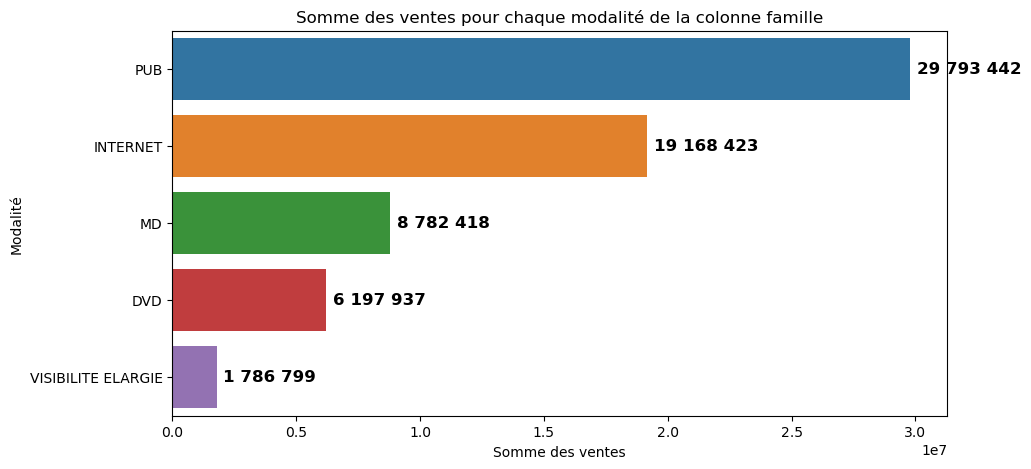

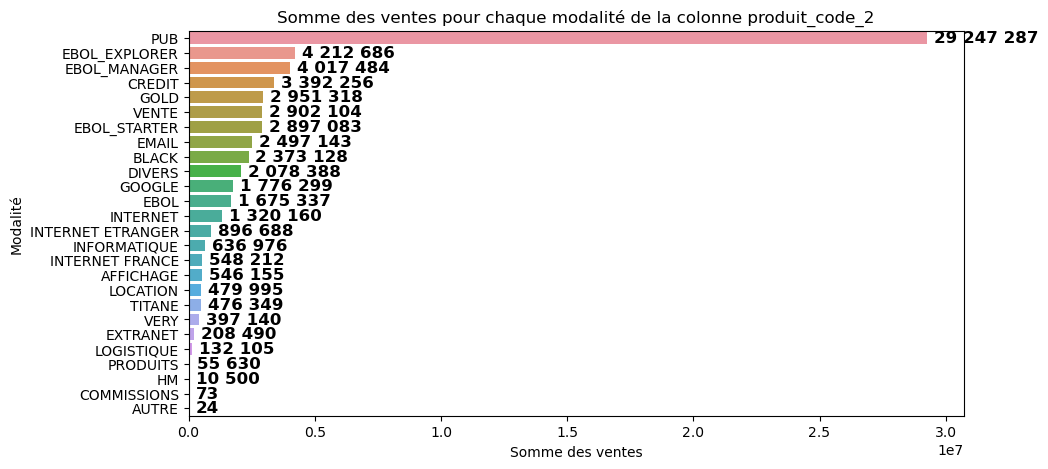

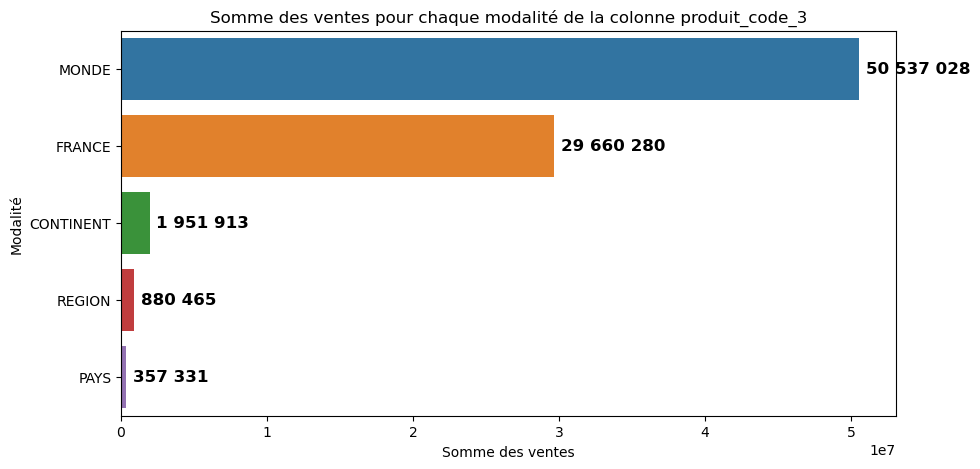

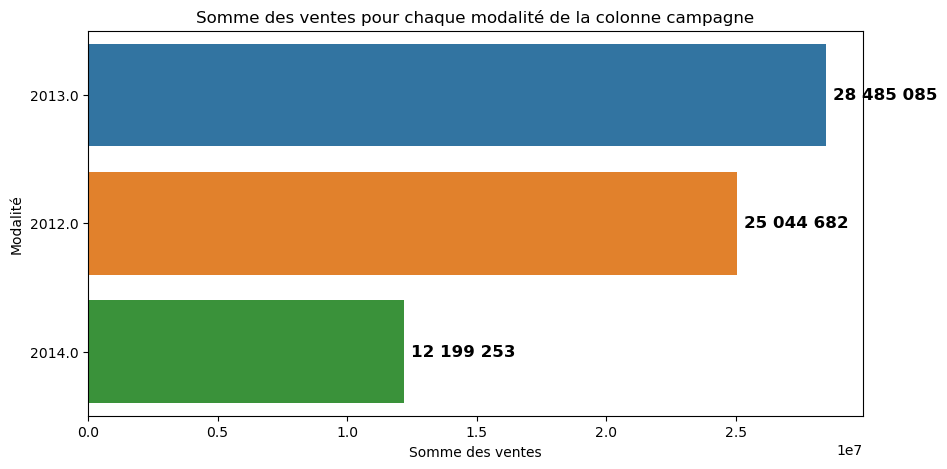

In [17]:
colonnes_a_analyser = ['famille', 'produit_code_2', 'produit_code_3', 'campagne']
df['campagne'] = df['campagne'].astype(str)

# Calcul de la somme des ventes pour chaque modalité et affichage des résultats
for col in colonnes_a_analyser:
    sum_sales = df.groupby(col)['ca_avec_remise'].sum().sort_values(ascending=False)

    # Création de graphique pour chaque colonne avec les chiffres au-dessus de chaque barre
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=sum_sales.values, y=sum_sales.index)
    plt.title(f"Somme des ventes pour chaque modalité de la colonne {col}")
    plt.xlabel('Somme des ventes')
    plt.ylabel('Modalité')

    # Ajouter les chiffres au-dessus de chaque barre
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(format_number(int(width)), 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', xytext=(5, 0), 
                    textcoords='offset points', fontsize=12, fontweight='bold')

    plt.show()

### Sommes des ventes de par rapport a chaque sous categorie (produit_code_2) de chaque famille

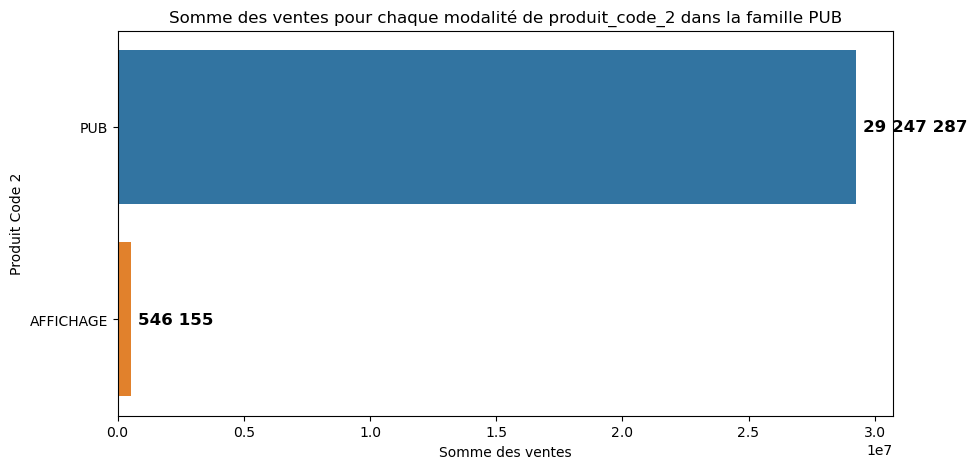

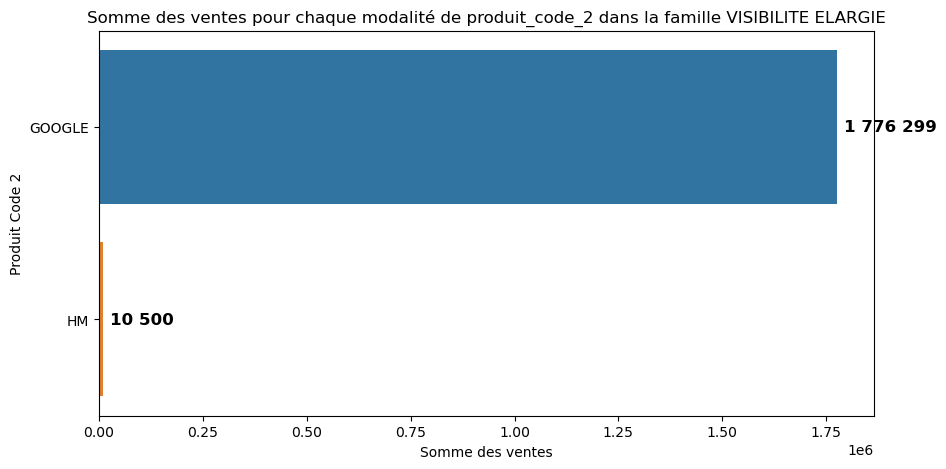

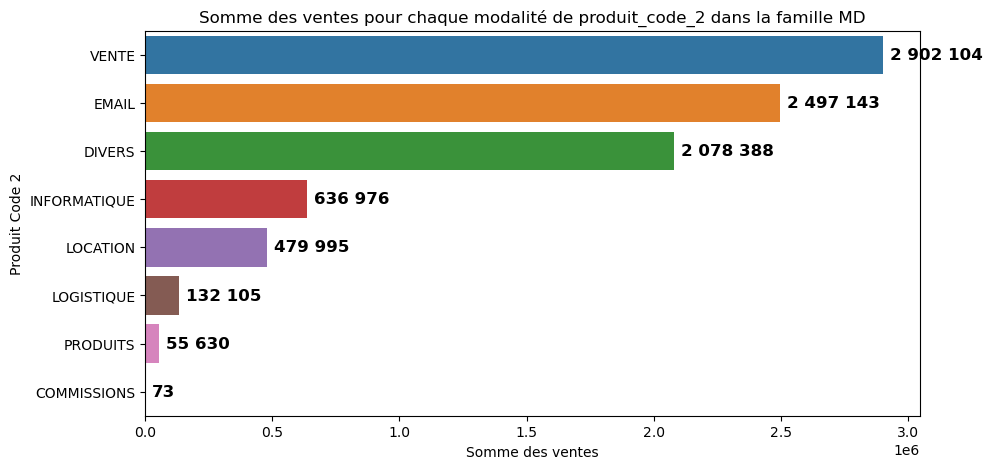

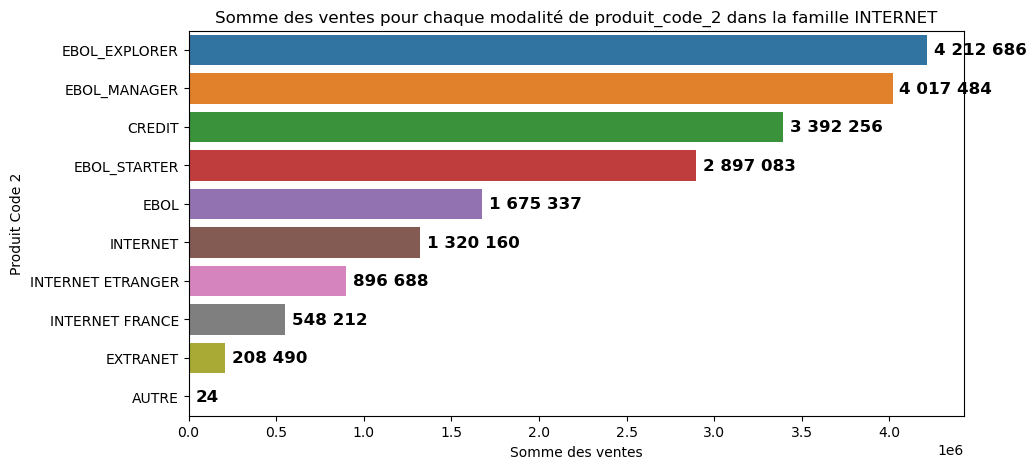

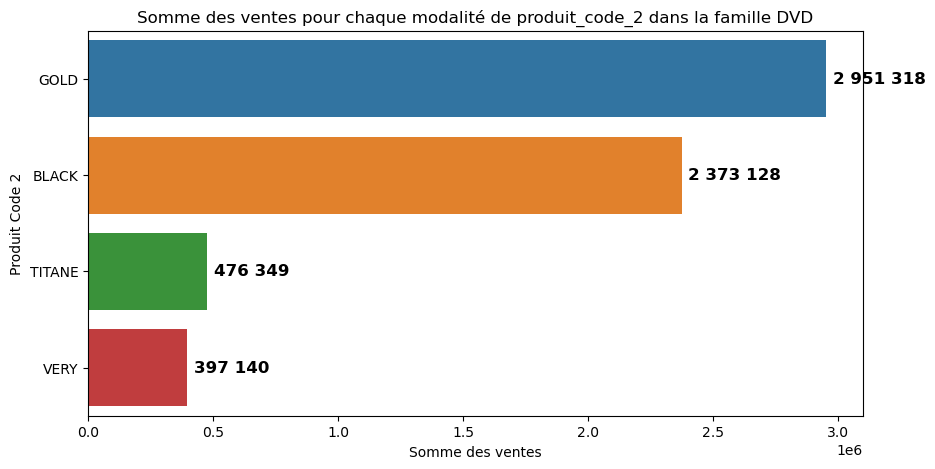

In [18]:
colonnes_a_analyser = ['produit_code_2']

# Visualisation de la relation entre 'famille' et 'produit_code_2' avec la somme des ventes
for famille in df['famille'].unique():
    subset = df[df['famille'] == famille]
    sum_sales = subset.groupby('produit_code_2')['ca_avec_remise'].sum().sort_values(ascending=False)
    
    # Création de graphique pour chaque modalité de 'famille' avec les chiffres au-dessus de chaque barre
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=sum_sales.values, y=sum_sales.index)
    plt.title(f"Somme des ventes pour chaque modalité de produit_code_2 dans la famille {famille}")
    plt.xlabel('Somme des ventes')
    plt.ylabel('Produit Code 2')
    
    # Ajouter les chiffres au-dessus de chaque barre
    for p in ax.patches:
        ax.annotate(format_number(int(p.get_width())), 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', xytext=(5, 0), 
                    textcoords='offset points', fontsize=12, fontweight='bold')

    plt.show()

### Sommes des ventes de par rapport a chaque sous categorie (produit_code_2) de chaque famille

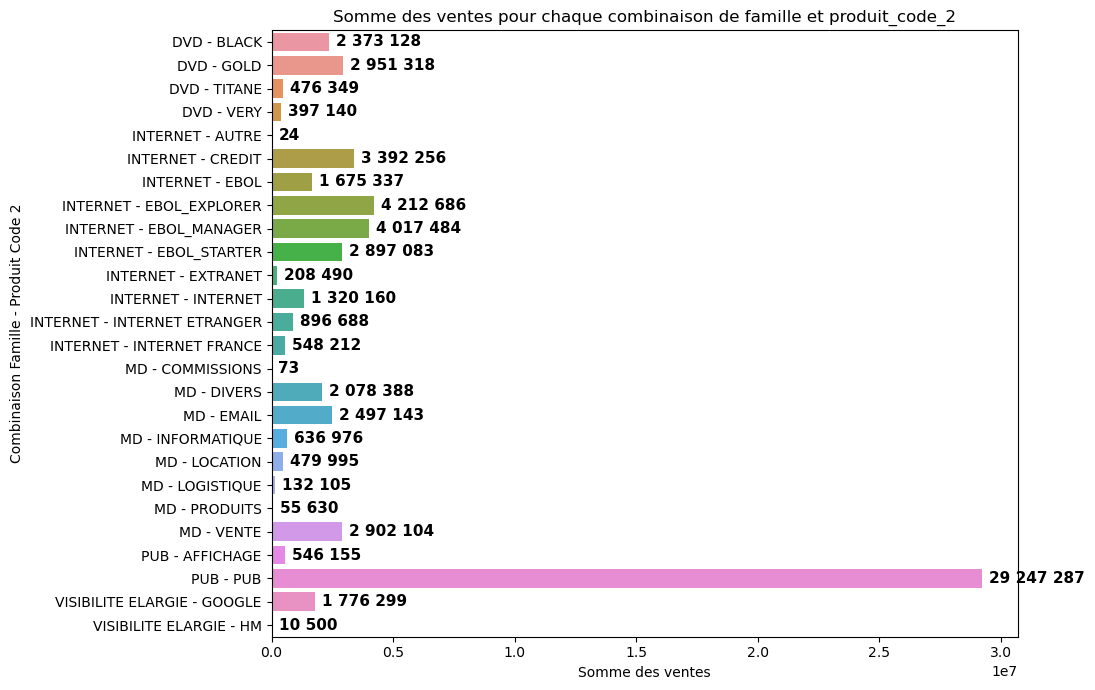

In [19]:
# Calcul de la somme des ventes pour chaque combinaison de famille et produit_code_2
sum_sales_combined = df.groupby('famille_produit_code_2')['ca_avec_remise'].sum()

# Création d'un graphique combiné
plt.figure(figsize=(11, 7))
ax = sns.barplot(x=sum_sales_combined.values, y=sum_sales_combined.index)
plt.title(f"Somme des ventes pour chaque combinaison de famille et produit_code_2")
plt.xlabel('Somme des ventes')
plt.ylabel('Combinaison Famille - Produit Code 2')

# Ajouter les chiffres au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format_number(int(p.get_width())), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', xytext=(5, 0), 
                textcoords='offset points', fontweight = 'bold', fontsize = 11)

plt.tight_layout()
plt.show()

### Croissance des ventes par famille et produit_code_2 au fils des annes

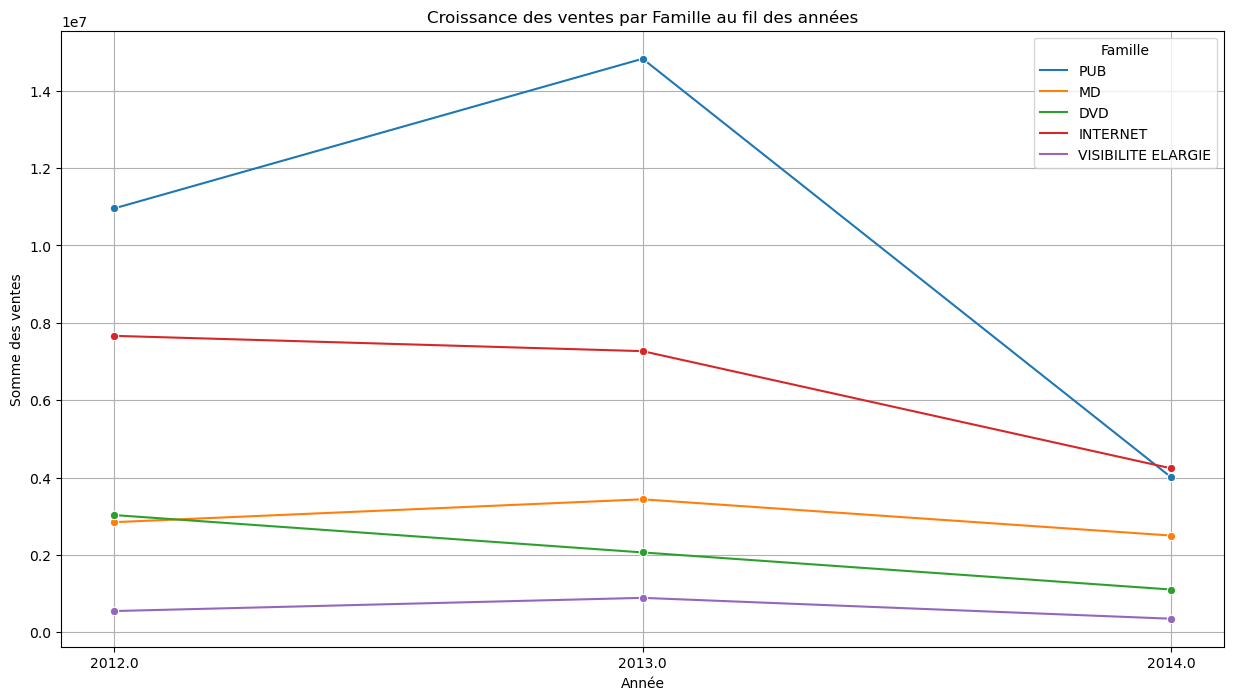

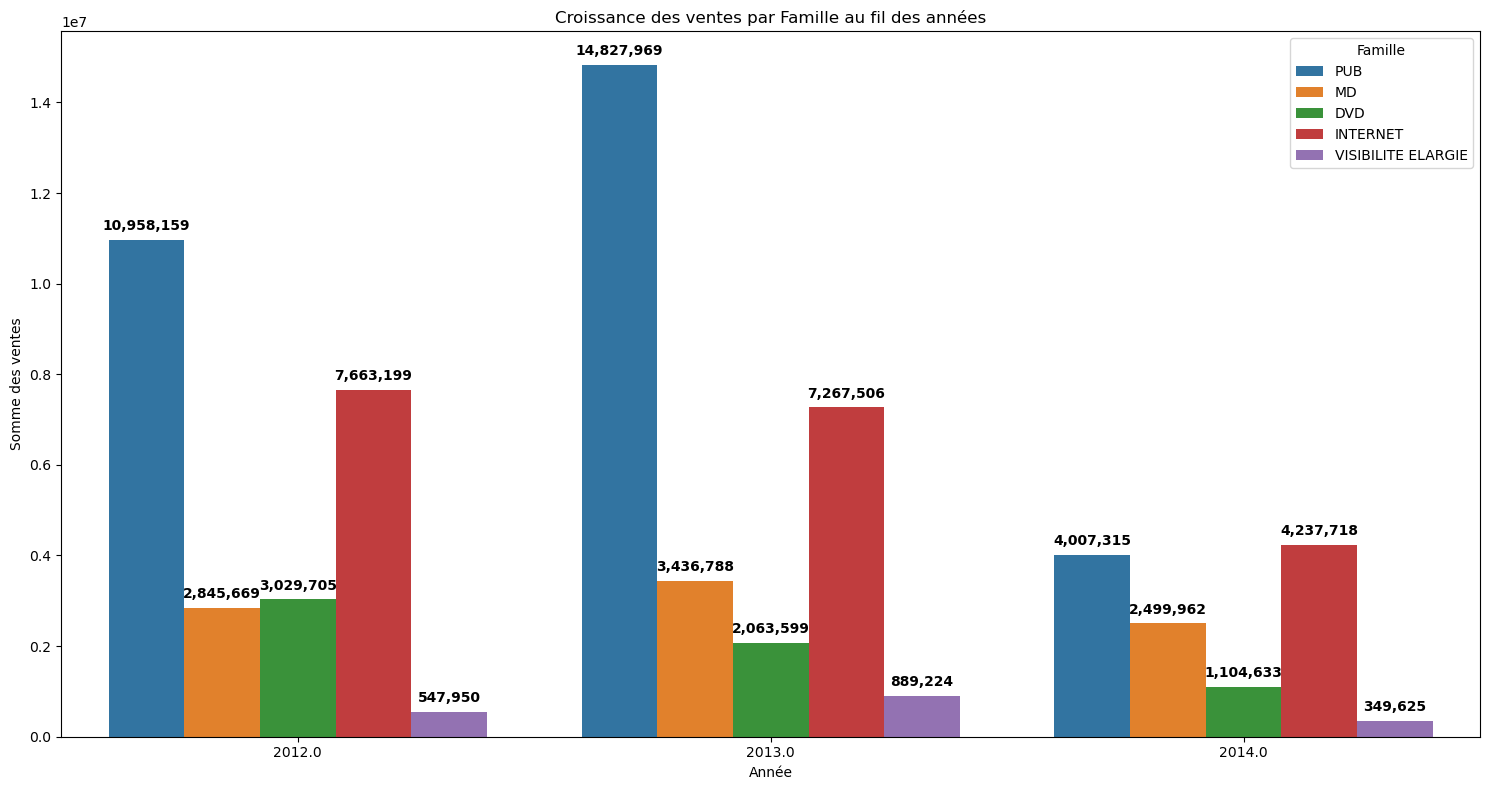

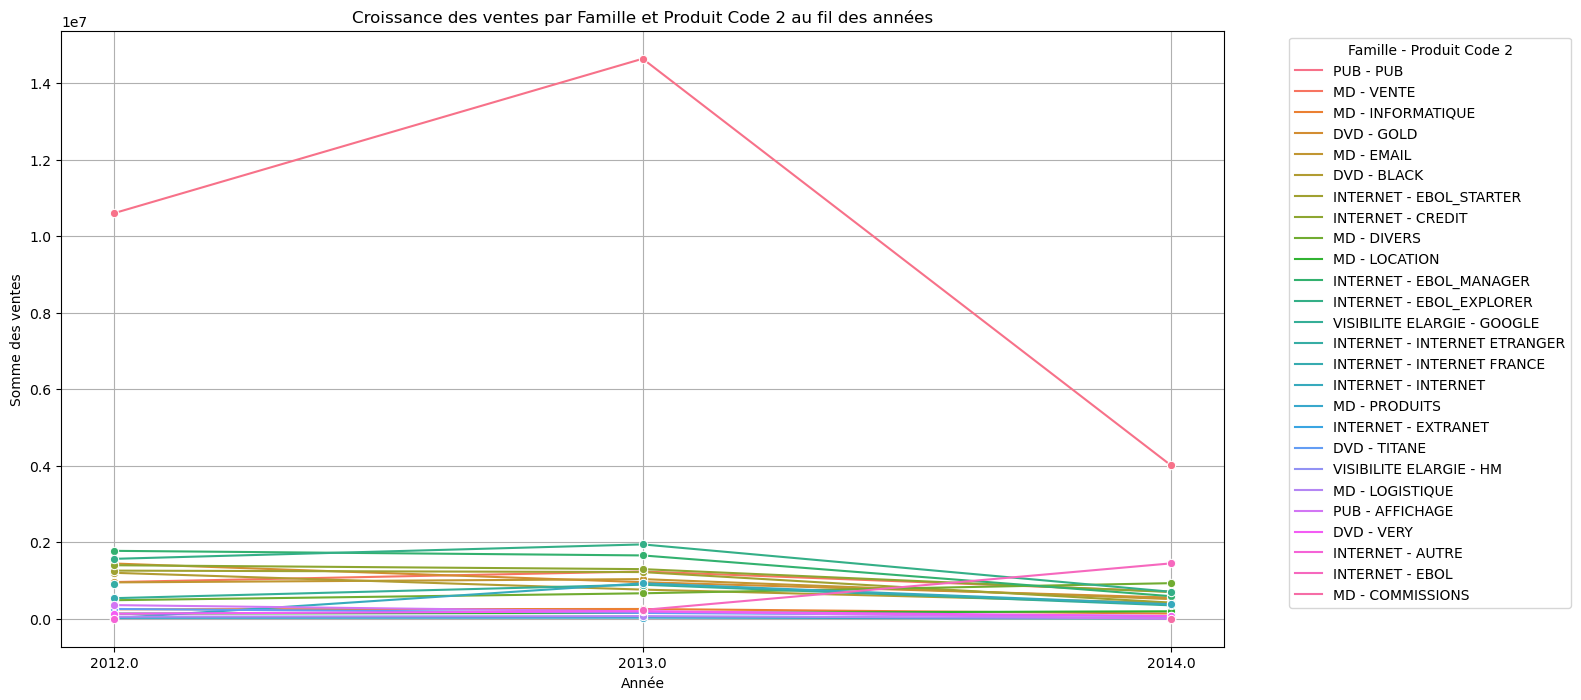

In [20]:
df_sorted = df.sort_values('campagne')

#-------------------------------------------------------------Famille--------------------------------'
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_sorted, x='campagne', y='ca_avec_remise', hue='famille', estimator='sum', ci=None, marker='o')
plt.title("Croissance des ventes par Famille au fil des années")
plt.xlabel('Année')
plt.ylabel('Somme des ventes')
plt.legend(title='Famille')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_sorted, x='campagne', y='ca_avec_remise', hue='famille', estimator='sum', ci=None)
plt.title("Croissance des ventes par Famille au fil des années")
plt.xlabel('Année')
plt.ylabel('Somme des ventes')
plt.legend(title='Famille')
plt.grid(False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


#-------------------------------------------------------------famille_produit_code_2--------------------------------'
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_sorted, x='campagne', y='ca_avec_remise', hue='famille_produit_code_2', estimator='sum', ci=None, marker='o')
plt.title("Croissance des ventes par Famille et Produit Code 2 au fil des années")
plt.xlabel('Année')
plt.ylabel('Somme des ventes')
plt.legend(title='Famille - Produit Code 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Croissance des ventes par famille et produit_code_2 au fils des mois

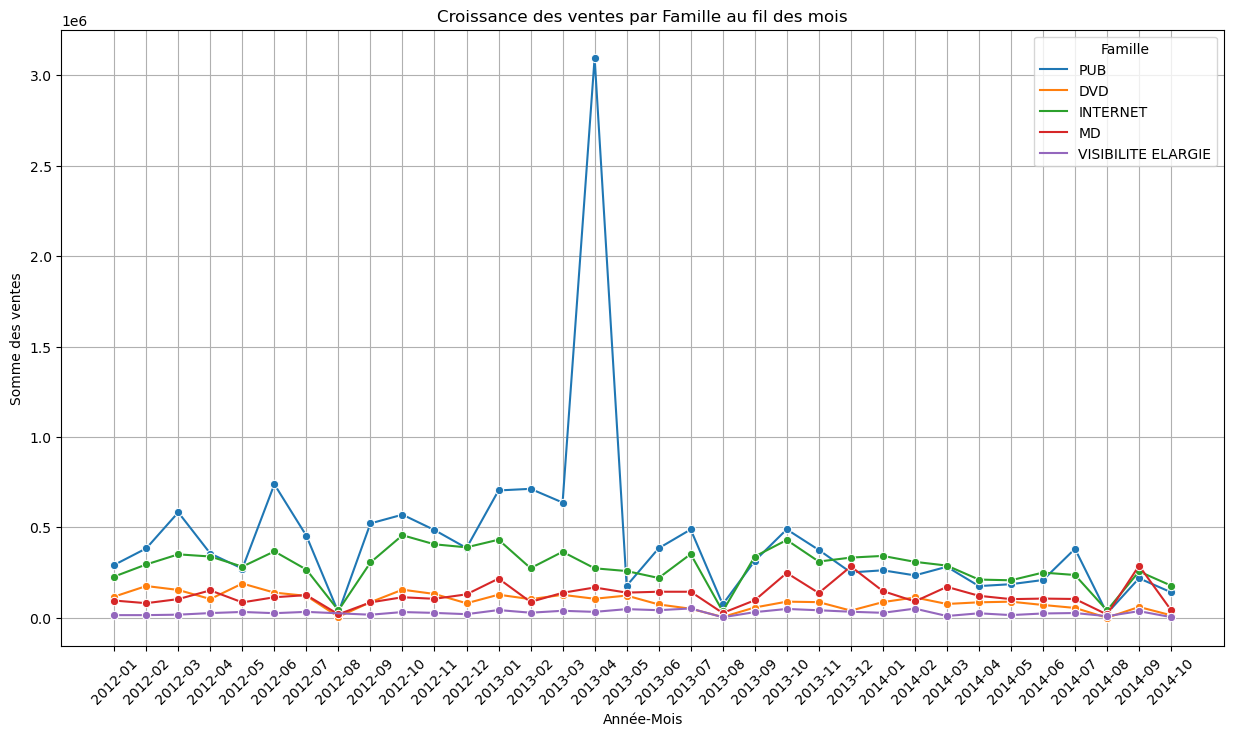

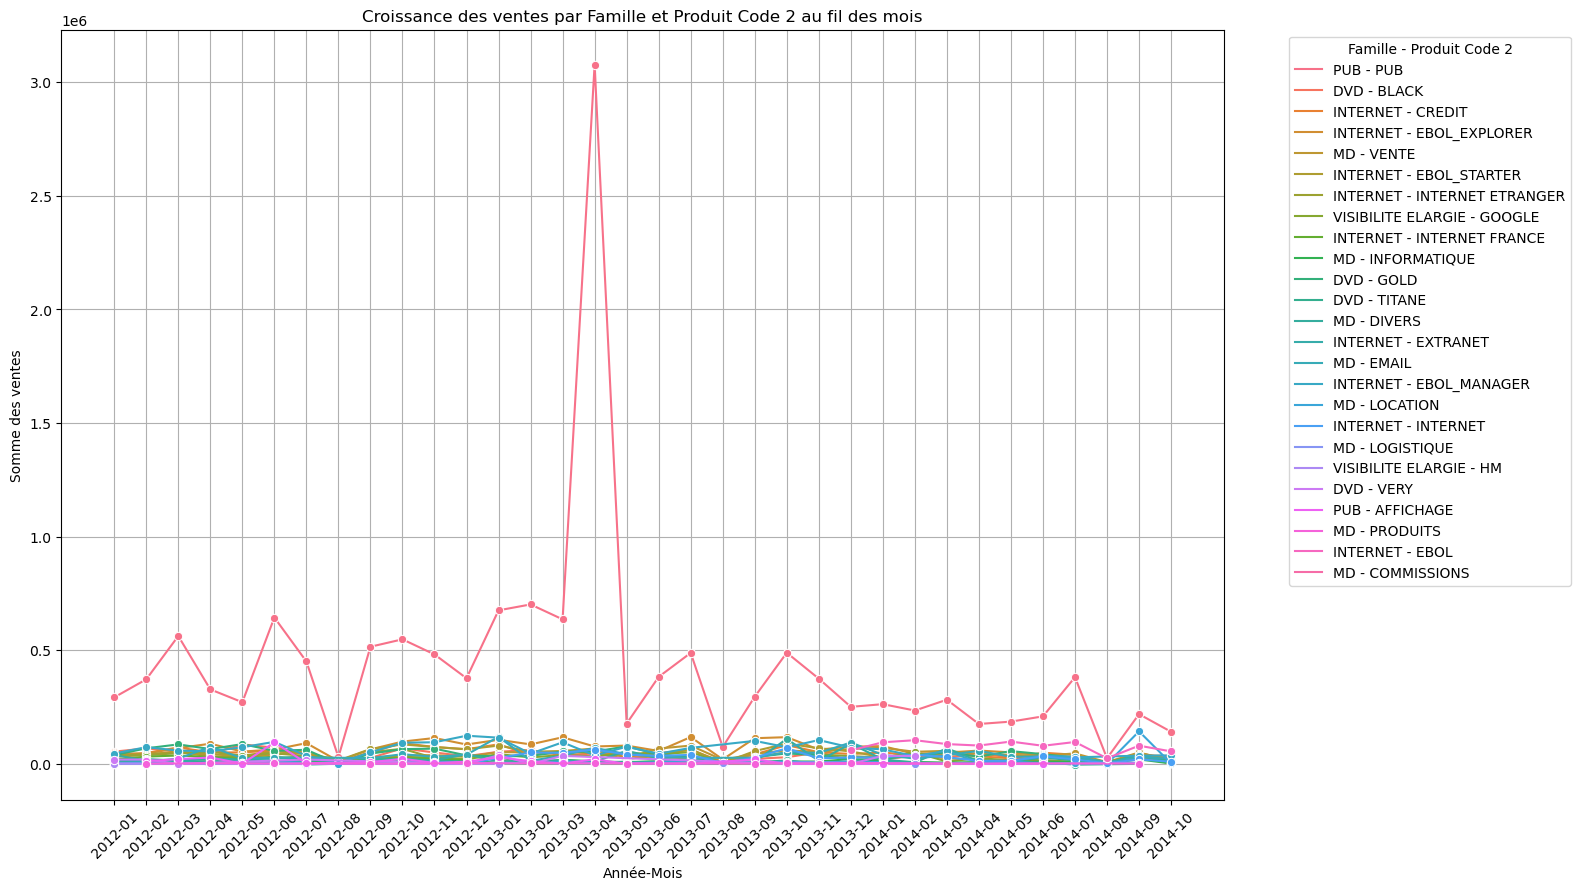

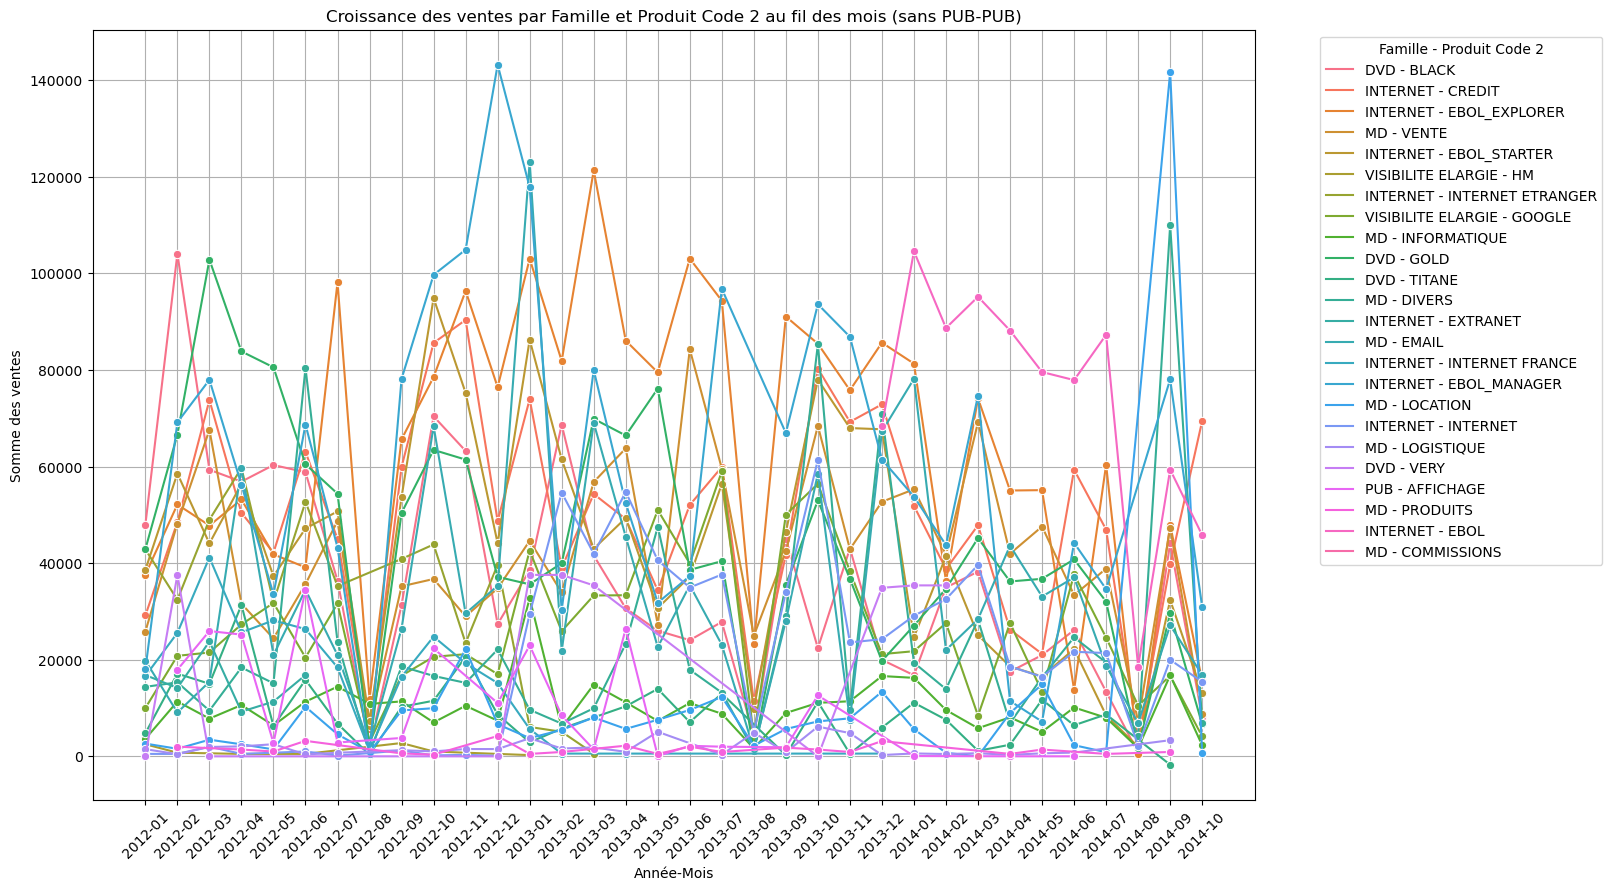

In [21]:
df_sorted = df.sort_values('year_month')

# Création d'un graphique pour la croissance des ventes par 'famille'
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_sorted[::2], x='year_month', y='ca_avec_remise', hue='famille', estimator='sum', ci=None, marker='o')
plt.title("Croissance des ventes par Famille au fil des mois")
plt.xlabel('Année-Mois')
plt.ylabel('Somme des ventes')
plt.legend(title='Famille')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

# Création d'un graphique pour la croissance des ventes par 'famille_produit_code_2'
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_sorted[::2], x='year_month', y='ca_avec_remise', hue='famille_produit_code_2', estimator='sum', ci=None, marker='o')
plt.title("Croissance des ventes par Famille et Produit Code 2 au fil des mois")
plt.xlabel('Année-Mois')
plt.ylabel('Somme des ventes')
plt.legend(title='Famille - Produit Code 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

# Création d'un graphique pour la croissance des ventes par 'famille_produit_code_2' en excluant 'PUB-PUB'
plt.figure(figsize=(15, 10))
filtered_df = df_sorted[df_sorted['famille_produit_code_2'] != 'PUB - PUB']  # Filtrer le DataFrame trié en excluant 'PUB-PUB'
sns.lineplot(data=filtered_df[::2], x='year_month', y='ca_avec_remise', hue='famille_produit_code_2', estimator='sum', ci=None, marker='o')
plt.title("Croissance des ventes par Famille et Produit Code 2 au fil des mois (sans PUB-PUB)")
plt.xlabel('Année-Mois')
plt.ylabel('Somme des ventes')
plt.legend(title='Famille - Produit Code 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

### Croissance des ventes par produit_code_2 au fils des mois en fonction de chaque famille

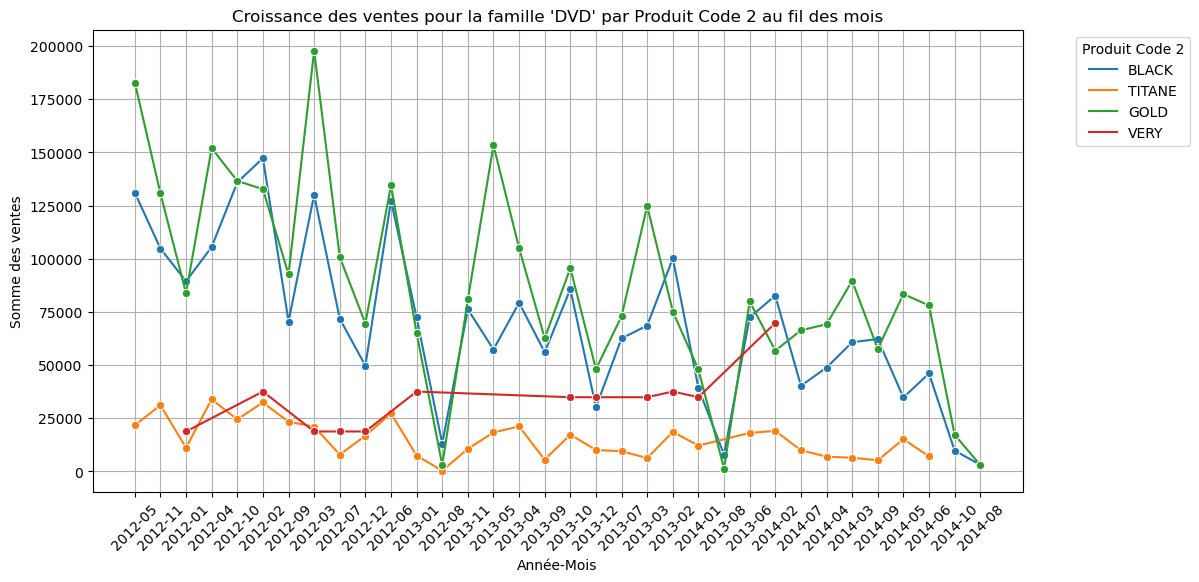

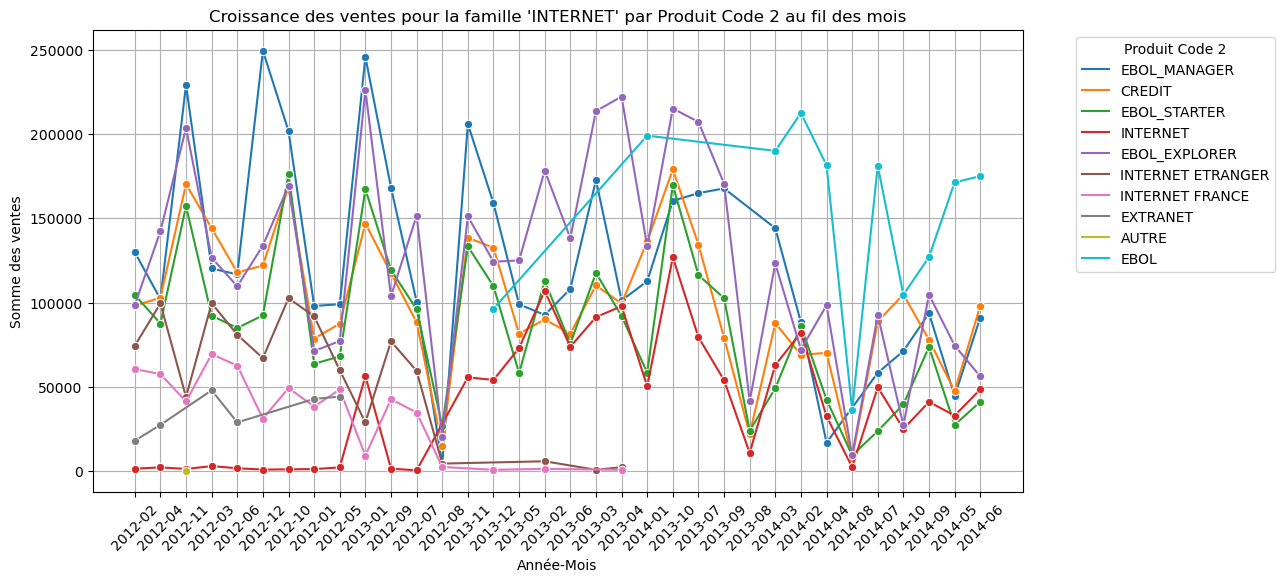

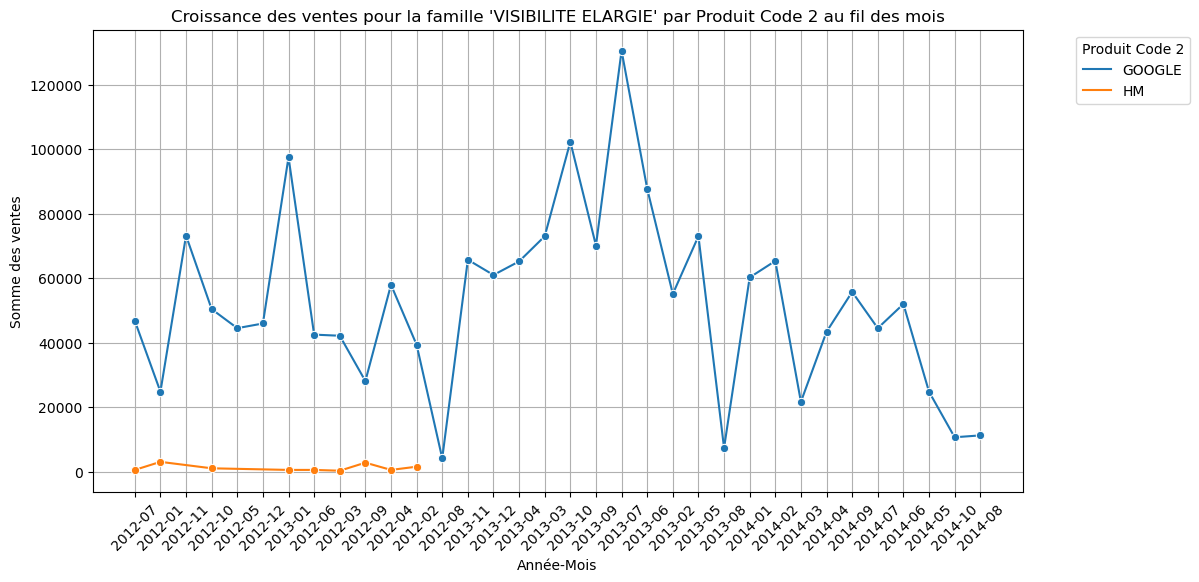

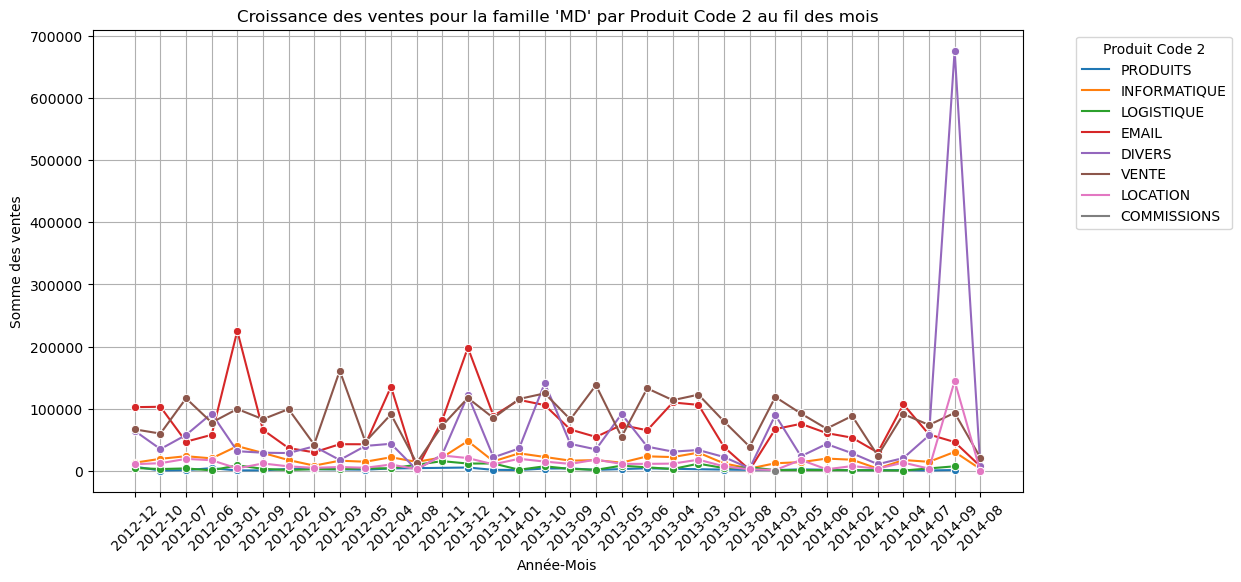

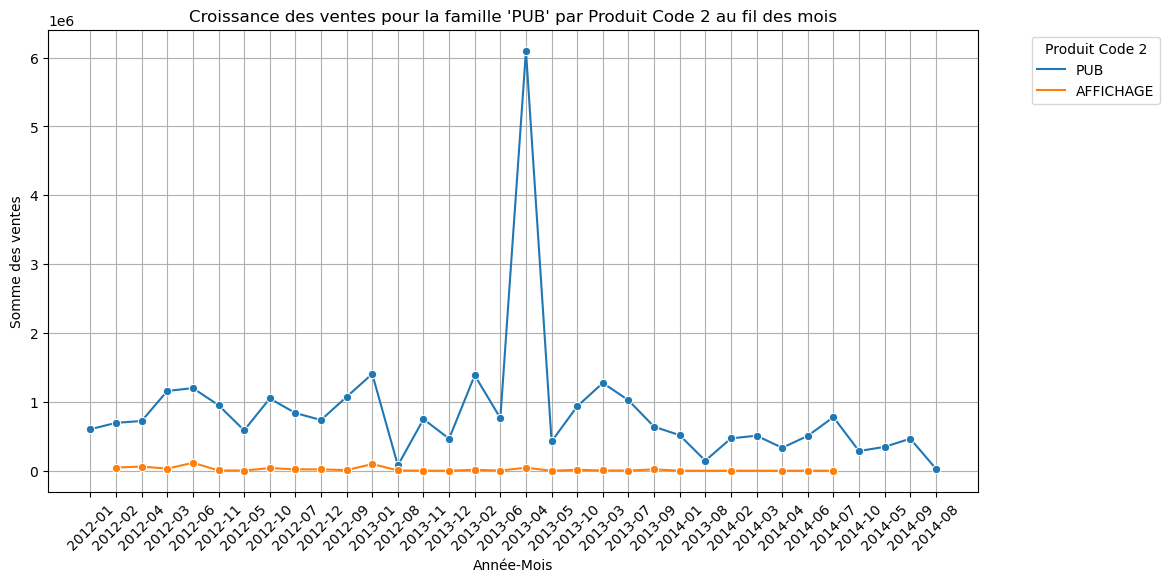

In [22]:
famille_order = df.groupby('famille')['produit_code_2'].sum().sort_values().index

# Création d'un graphique pour chaque modalité de 'famille'
for famille in famille_order:
    subset = df[df['famille'] == famille]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=subset, x='year_month', y='ca_avec_remise', hue='produit_code_2', estimator='sum', ci=None, marker='o')
    plt.title(f"Croissance des ventes pour la famille '{famille}' par Produit Code 2 au fil des mois")
    plt.xlabel('Année-Mois')
    plt.ylabel('Somme des ventes')
    plt.legend(title='Produit Code 2', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# AXE : AGENCE (agence)

### Top Agence par vente sur les 3 campagne

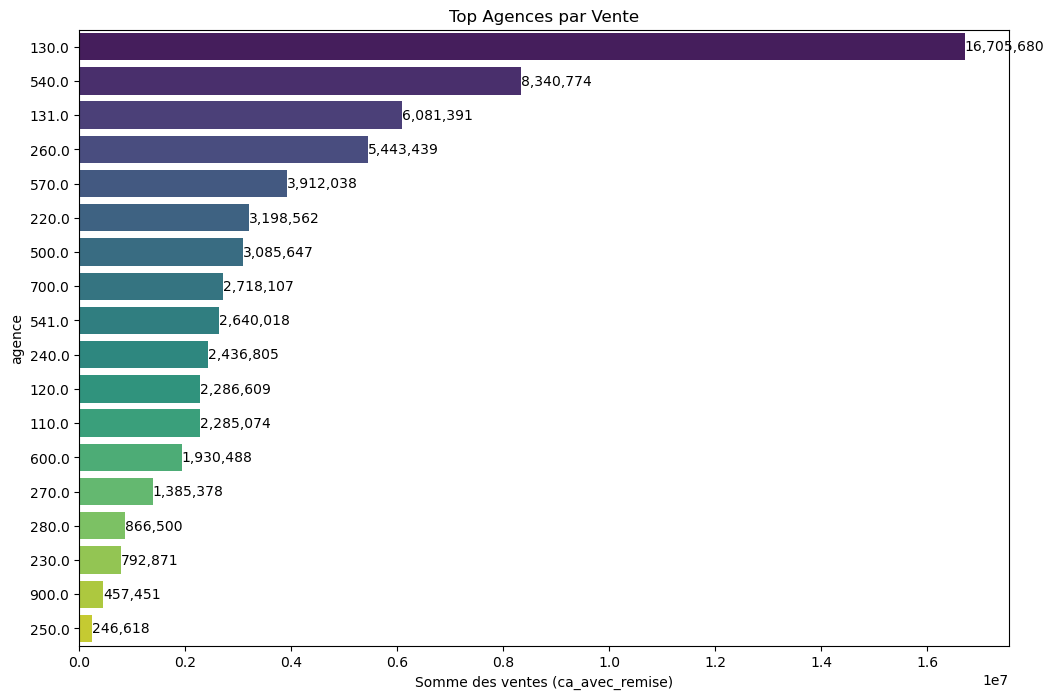

In [23]:
agence_sales = df.groupby('agence')['ca_avec_remise'].sum().reset_index()
agence_sales_sorted = agence_sales.sort_values(by='ca_avec_remise', ascending=False)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=agence_sales_sorted, x='ca_avec_remise', y='agence', palette='viridis')
for index, value in enumerate(agence_sales_sorted['ca_avec_remise']):
    bar_plot.text(value, index, f'{value:,.0f}', va='center')
plt.title('Top Agences par Vente')
plt.xlabel('Somme des ventes (ca_avec_remise)')
plt.ylabel('agence')
plt.show()

### Les Agence par vente sur les 3 differentes mois

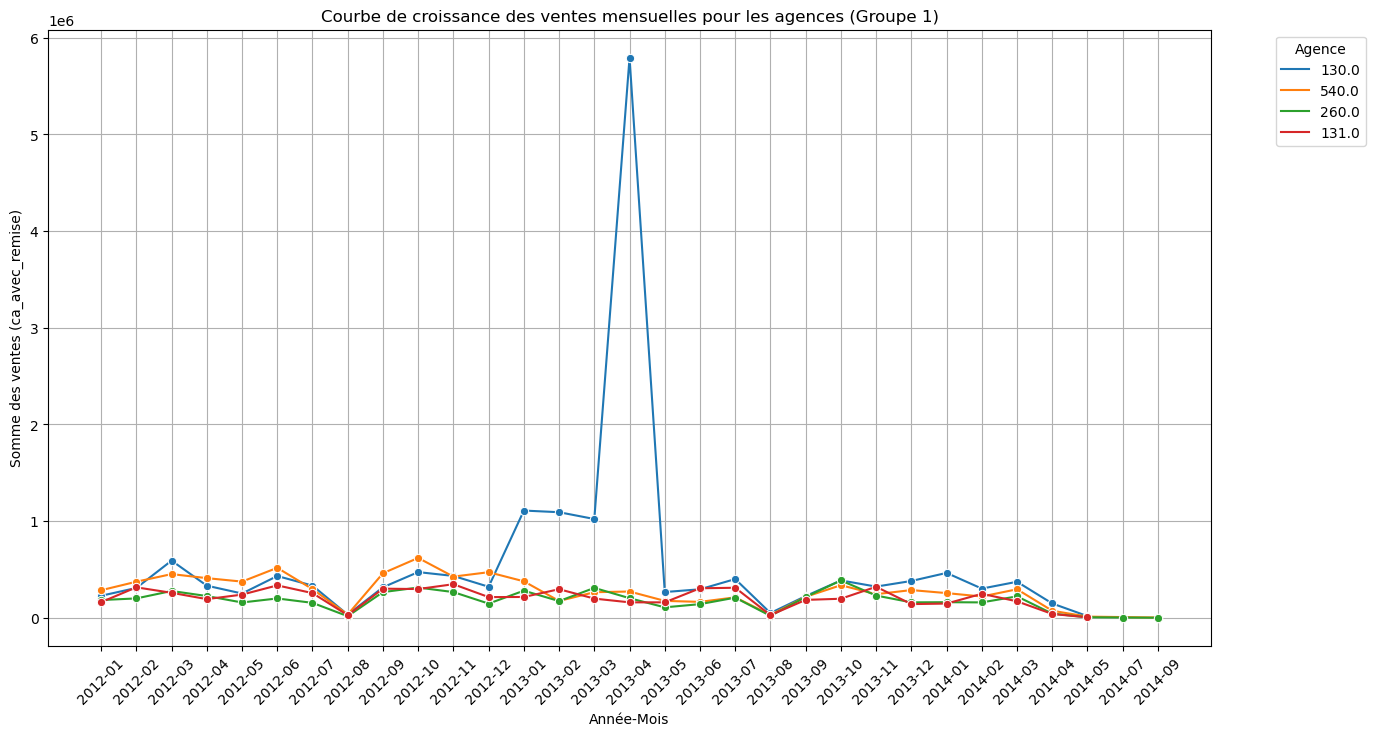

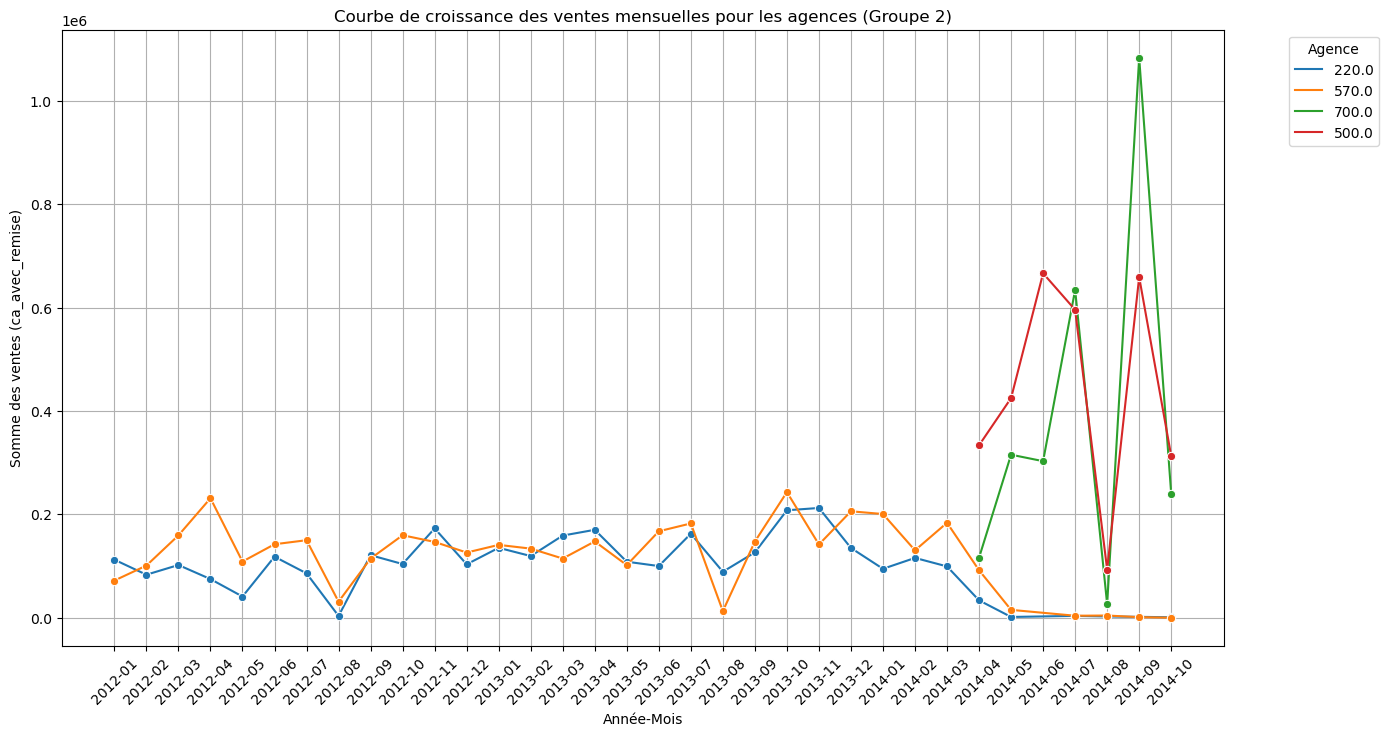

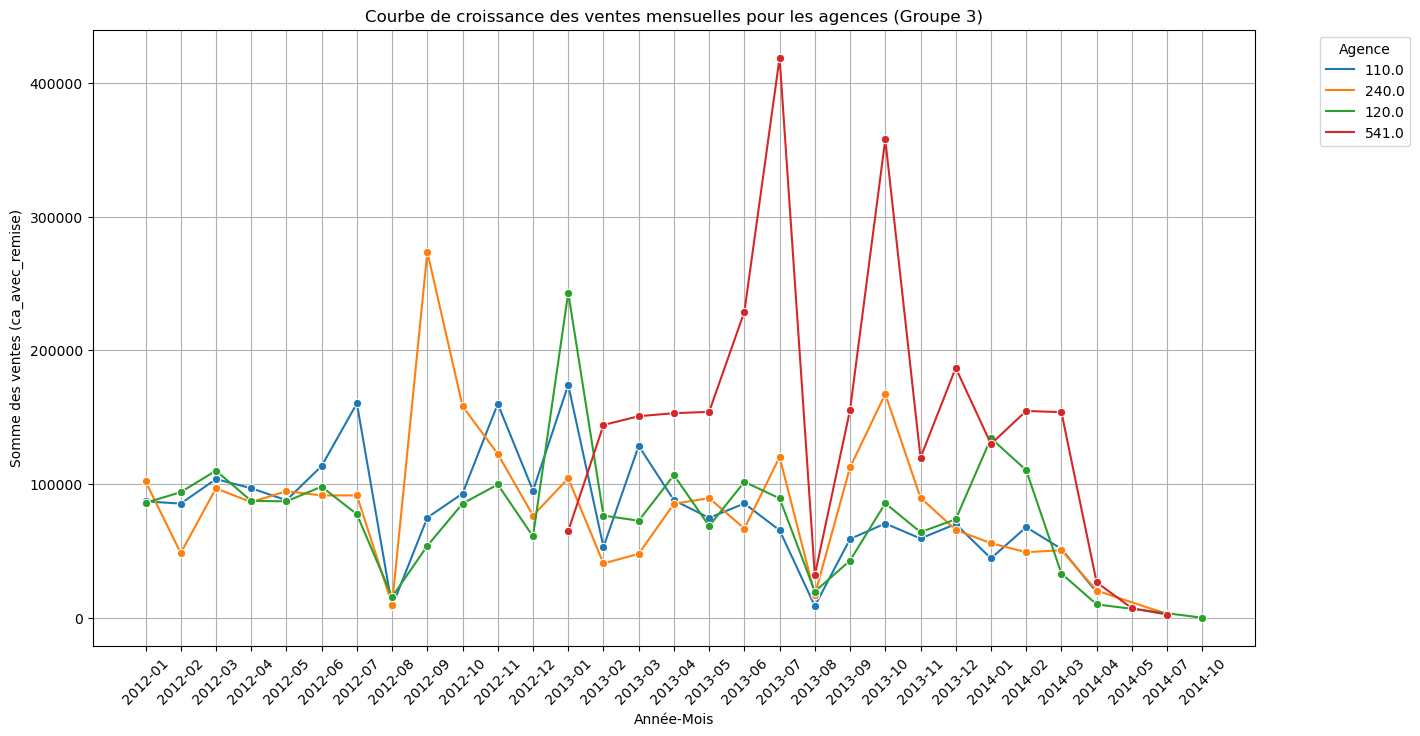

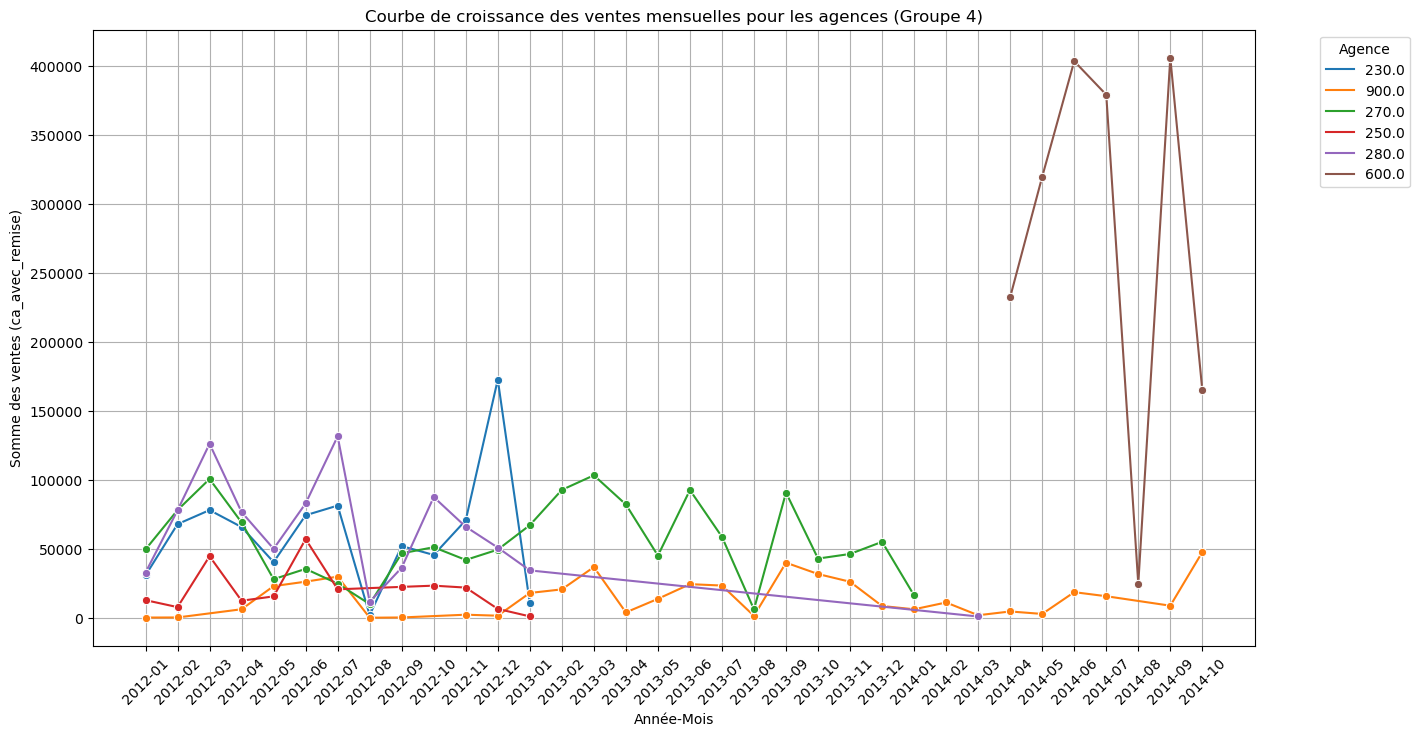

In [24]:
agence_monthly_sales = df.groupby(['agence', 'year_month'])['ca_avec_remise'].sum().reset_index()

# Trier les ventes totales par agence en ordre décroissant
agence_total_sales = df.groupby('agence')['ca_avec_remise'].sum().sort_values(ascending=False).reset_index()

# Diviser les agences en quatre groupes
quarter_point = len(agence_total_sales) // 4
top_agencies_group1 = agence_total_sales.iloc[:quarter_point]['agence']
top_agencies_group2 = agence_total_sales.iloc[quarter_point:2*quarter_point]['agence']
top_agencies_group3 = agence_total_sales.iloc[2*quarter_point:3*quarter_point]['agence']
top_agencies_group4 = agence_total_sales.iloc[3*quarter_point:]['agence']

# Filtrer les données pour chaque groupe
group1_data = agence_monthly_sales[agence_monthly_sales['agence'].isin(top_agencies_group1)]
group2_data = agence_monthly_sales[agence_monthly_sales['agence'].isin(top_agencies_group2)]
group3_data = agence_monthly_sales[agence_monthly_sales['agence'].isin(top_agencies_group3)]
group4_data = agence_monthly_sales[agence_monthly_sales['agence'].isin(top_agencies_group4)]

# Triez les données par 'year_month' pour garantir l'ordre correct
group1_data = group1_data.sort_values('year_month')
group2_data = group2_data.sort_values('year_month')
group3_data = group3_data.sort_values('year_month')
group4_data = group4_data.sort_values('year_month')

# Fonction pour tracer les courbes de croissance
def plot_growth_curve(group_data, group_title):
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=group_data, x='year_month', y='ca_avec_remise', hue='agence', estimator='sum', ci=None, marker='o')
    plt.title(f'Courbe de croissance des ventes mensuelles pour les agences ({group_title})')
    plt.xlabel('Année-Mois')
    plt.ylabel('Somme des ventes (ca_avec_remise)')
    plt.legend(title='Agence', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Créer des graphiques pour chaque groupe
plot_growth_curve(group1_data, 'Groupe 1')
plot_growth_curve(group2_data, 'Groupe 2')
plot_growth_curve(group3_data, 'Groupe 3')
plot_growth_curve(group4_data, 'Groupe 4')

# AXE : VENDEUR ET DENONCE CLIENT 

In [25]:
parsian_df = df[df['vendeur'] == 'PARSIANI FRANCOIS']

# Nombre total de ventes réalisées par PARSIAN FRANCOIS
total_ventes = len(parsian_df)

# Nombre de services rompus par PARSIAN FRANCOIS
services_rompus = len(parsian_df[parsian_df['denonce_client'] == 'OUI'])
services_non_rompus = len(parsian_df[parsian_df['denonce_client'] == 'NON'])

print(f"Nombre de services non rompus avec PARSIAN FRANCOIS: {services_non_rompus}")
print(f"Nombre de services rompus avec PARSIAN FRANCOIS : {services_rompus}")

Nombre de services non rompus avec PARSIAN FRANCOIS: 1772
Nombre de services rompus avec PARSIAN FRANCOIS : 464


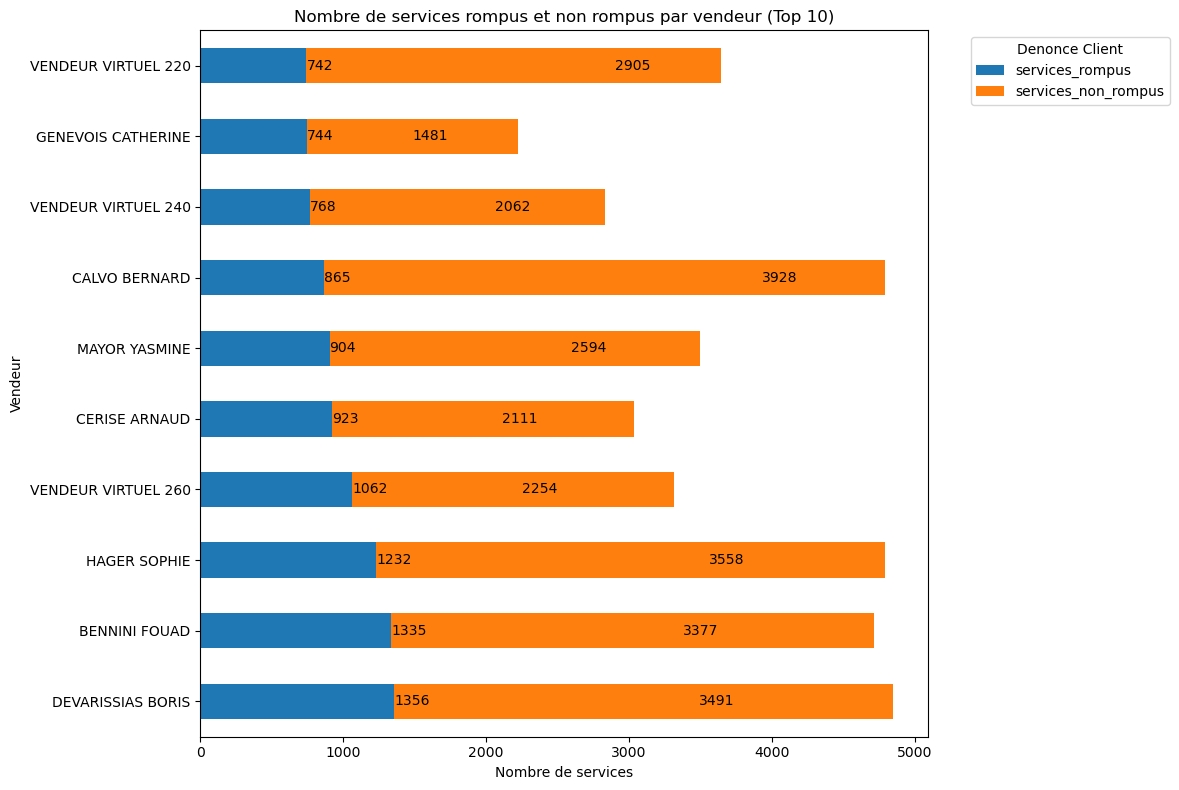

In [26]:
# Grouper les données par vendeur
grouped_df = df.groupby('vendeur').agg({
    'denonce_client': lambda x: (x == 'OUI').sum(),
    'id_kompass_facture': 'count'
}).rename(columns={'denonce_client': 'services_rompus', 'id_kompass_facture': 'total_ventes'})

# Calculer le nombre de services non rompus
grouped_df['services_non_rompus'] = grouped_df['total_ventes'] - grouped_df['services_rompus']

# Trier les vendeurs en fonction du nombre de services rompus
grouped_df = grouped_df.sort_values(by='services_rompus', ascending=False)

# Sélectionner les 10 premiers vendeurs
top_10_vendeurs = grouped_df.head(10)

# Plotting
plt.figure(figsize=(12, 8))
bars = top_10_vendeurs[['services_rompus', 'services_non_rompus']].plot(kind='barh', stacked=True, ax=plt.gca())

# Ajouter les chiffres devant chaque barre
for bar in bars.containers:
    for rect in bar:
        width = rect.get_width()
        plt.gca().text(width, rect.get_y() + rect.get_height()/2, f'{int(width)}', va='center', ha='left')

plt.title("Nombre de services rompus et non rompus par vendeur (Top 10)")
plt.xlabel("Nombre de services")
plt.ylabel("Vendeur")
plt.legend(title='Denonce Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


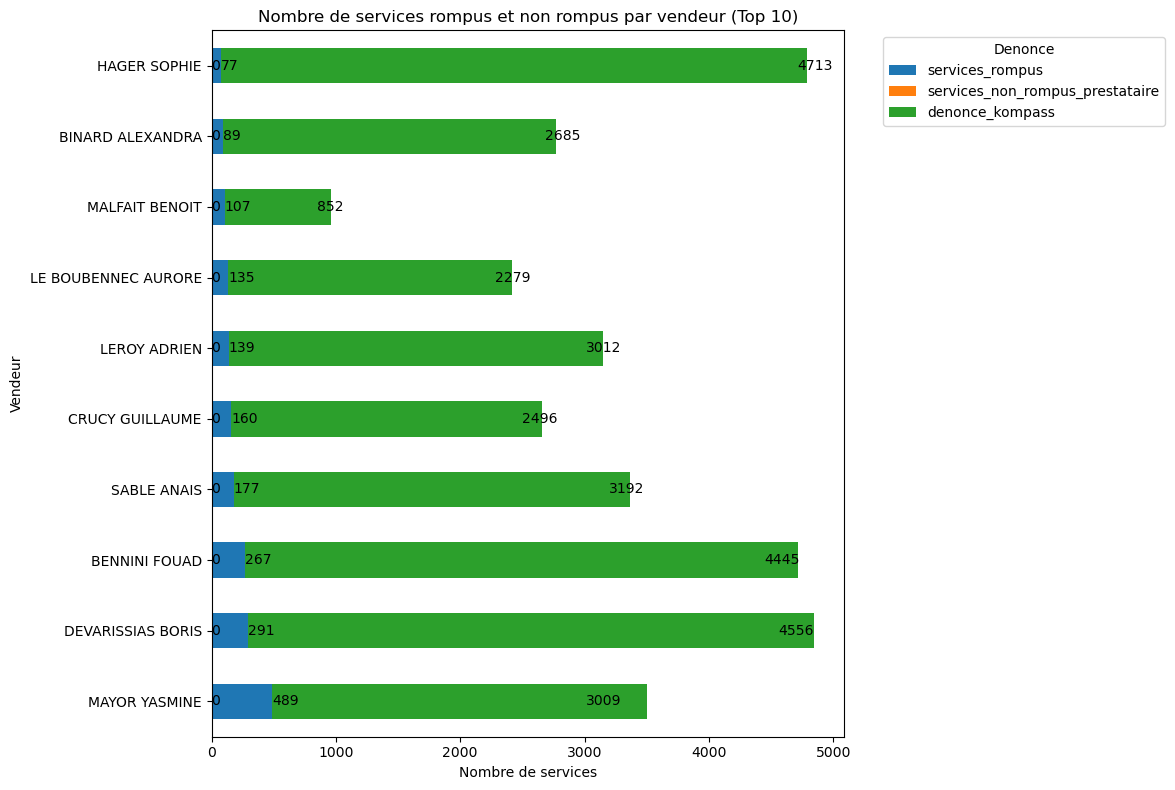

In [27]:
# Grouper les données par vendeur
grouped_df = df.groupby('vendeur').agg({
    'denonce_kompass': lambda x: (x == 'NON').sum(),
    'id_kompass_facture': 'count'
}).rename(columns={'id_kompass_facture': 'total_ventes'})

# Calculer le nombre de services rompus pour le prestataire
grouped_df['services_rompus'] = grouped_df['total_ventes'] - grouped_df['denonce_kompass']

# Calculer le nombre de services non rompus pour le prestataire
grouped_df['services_non_rompus_prestataire'] = grouped_df['total_ventes'] - grouped_df['services_rompus'] - grouped_df['denonce_kompass']

# Trier les vendeurs en fonction du nombre de services rompus
grouped_df = grouped_df.sort_values(by='services_rompus', ascending=False)

# Sélectionner les 10 premiers vendeurs
top_10_vendeurs = grouped_df.head(10)

# Plotting
plt.figure(figsize=(12, 8))
bars = top_10_vendeurs[['services_rompus', 'services_non_rompus_prestataire', 'denonce_kompass']].plot(kind='barh', stacked=True, ax=plt.gca())

# Ajouter les chiffres devant chaque barre
for bar in bars.containers:
    for rect in bar:
        width = rect.get_width()
        plt.gca().text(width, rect.get_y() + rect.get_height()/2, f'{int(width)}', va='center', ha='left')

plt.title("Nombre de services rompus et non rompus par vendeur (Top 10)")
plt.xlabel("Nombre de services")
plt.ylabel("Vendeur")
plt.legend(title='Denonce', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [28]:
df_d = df[df["denonce_client"] == "OUI"]
df_d

id_kompass_facture id_kompass_livre   famille produit_code_2  \
50                   2230             2230       PUB            PUB   
51                   2230             2230       PUB            PUB   
52                   2230             2230       PUB            PUB   
53                   2230             2230       PUB            PUB   
54                   2230             2230       PUB            PUB   
...                   ...              ...       ...            ...   
138603            9903271          9903271  INTERNET         CREDIT   
138630            9903626          8005561  INTERNET   EBOL_STARTER   
138631            9903626          8005561  INTERNET         CREDIT   
138632            9903626          8005561  INTERNET   EBOL_STARTER   
138633            9903626          8005561  INTERNET         CREDIT   

       produit_code_3     produit produit_code_5 produit_code_6 duree_produit  \
50              MONDE        LOGO            NaN            NaN       12 mois   
51              MONDE  PHOTO_PACK            NaN            NaN       12 mois   
52                NaN         NaN            NaN            NaN       12 mois   
53              MONDE         NaN            NaN            NaN       12 mois   
54              MONDE     MOT_CLE            NaN            NaN       12 mois   
...               ...         ...            ...            ...           ...   
138603         FRANCE        EBOL            NaN            NaN       12 mois   
138630           PAYS     SERVICE            NaN            NaN       12 mois   
138631           PAYS        EBOL            NaN            NaN       12 mois   
138632         FRANCE   FORMATION            NaN            NaN       12 mois   
138633           PAYS        EBOL            NaN            NaN       12 mois   

       reference_article                                description_article  \
50               A279728                                           Logo DVD   
51               A279728                                         Photo Pack   
52               A279728                                     Remise Pub Pub   
53               A279728                           Lien internet entreprise   
54               A279728                               Mot cl 3ieme offert   
...                  ...                                                ...   
138603           A325116        EasyBusiness France crdits supplmentaires   
138630           A334380                  EasyBusiness Starter 1 Pays 1 an    
138631           A334380          EasyBusiness Pays crdits supplmentaires   
138632           A334380  Formation Easybusiness Starter (valeur 500 Euros)   
138633           A334380          EasyBusiness Pays crdits supplmentaires   

       date_de_facturation  mois_de_facturation campagne  \
50              2012-04-18                    4   2012.0   
51              2012-04-18                    4   2012.0   
52              2012-04-18                    4   2012.0   
53              2012-04-18                    4   2012.0   
54              2012-04-18                    4   2012.0   
...                    ...                  ...      ...   
138603          2014-06-25                    6   2014.0   
138630          2014-09-29                    9   2014.0   
138631          2014-09-29                    9   2014.0   
138632          2014-09-29                    9   2014.0   
138633          2014-09-29                    9   2014.0   

        annee_de_facturation dans_un_pack trimestre order_tran_codes_3  \
50                      2012          Oui        T2         KINVX1T112   
51                      2012          Oui        T2         KINVX1T112   
52                      2012          Oui        T2         KINVX1T112   
53                      2012          Oui        T2         KINVX1T112   
54                      2012          Non        T2         KINVX1T112   
...                      ...          ...       ...                

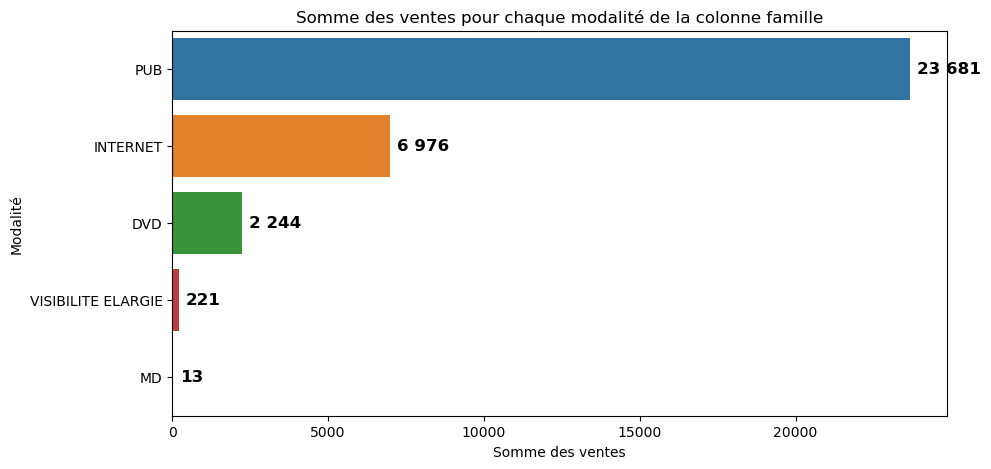

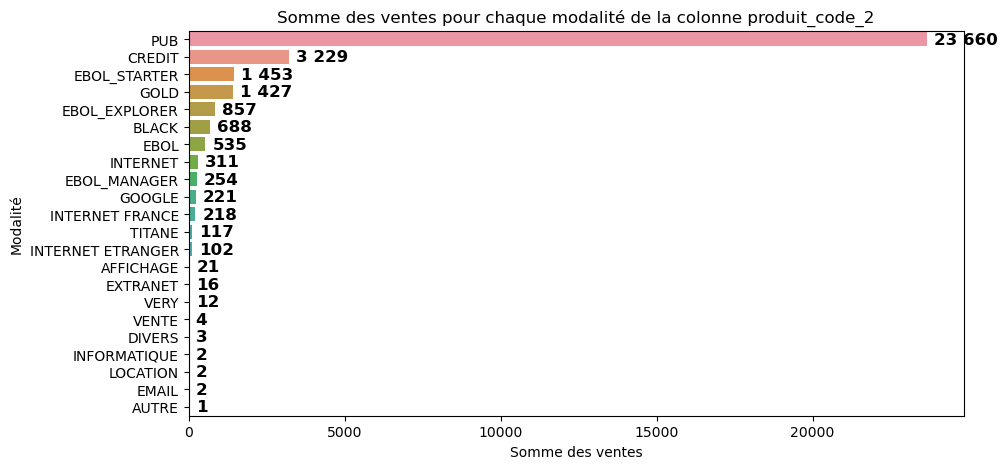

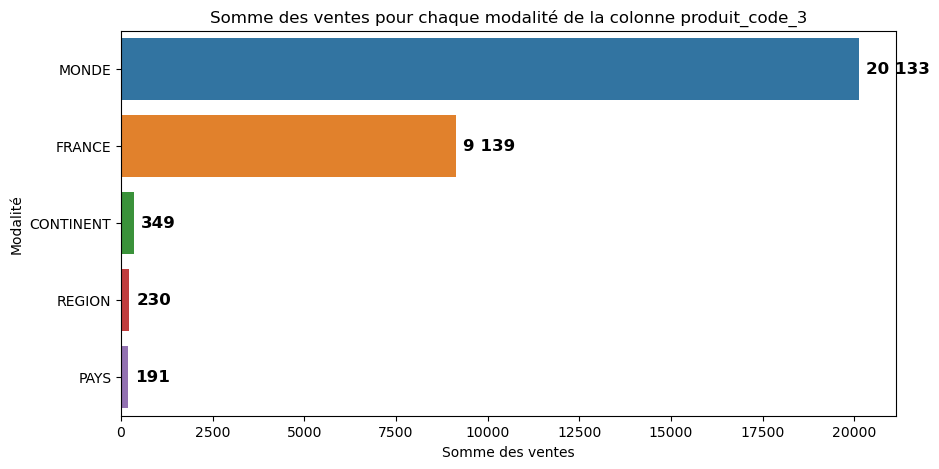

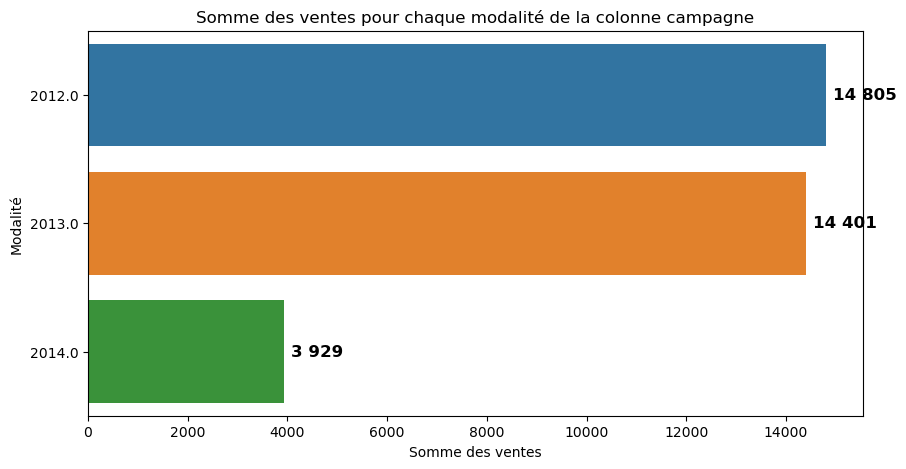

In [29]:
colonnes_a_analyser = ['famille', 'produit_code_2', 'produit_code_3', 'campagne']
df_d['campagne'] = df['campagne'].astype(str)

# Calcul de la somme des ventes pour chaque modalité et affichage des résultats
for col in colonnes_a_analyser:
    sum_sales = df_d.groupby(col)['ca_avec_remise'].count().sort_values(ascending=False)

    # Création de graphique pour chaque colonne avec les chiffres au-dessus de chaque barre
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=sum_sales.values, y=sum_sales.index)
    plt.title(f"Somme des ventes pour chaque modalité de la colonne {col}")
    plt.xlabel('Somme des ventes')
    plt.ylabel('Modalité')

    # Ajouter les chiffres au-dessus de chaque barre
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(format_number(int(width)), 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', xytext=(5, 0), 
                    textcoords='offset points', fontsize=12, fontweight='bold')

    plt.show()

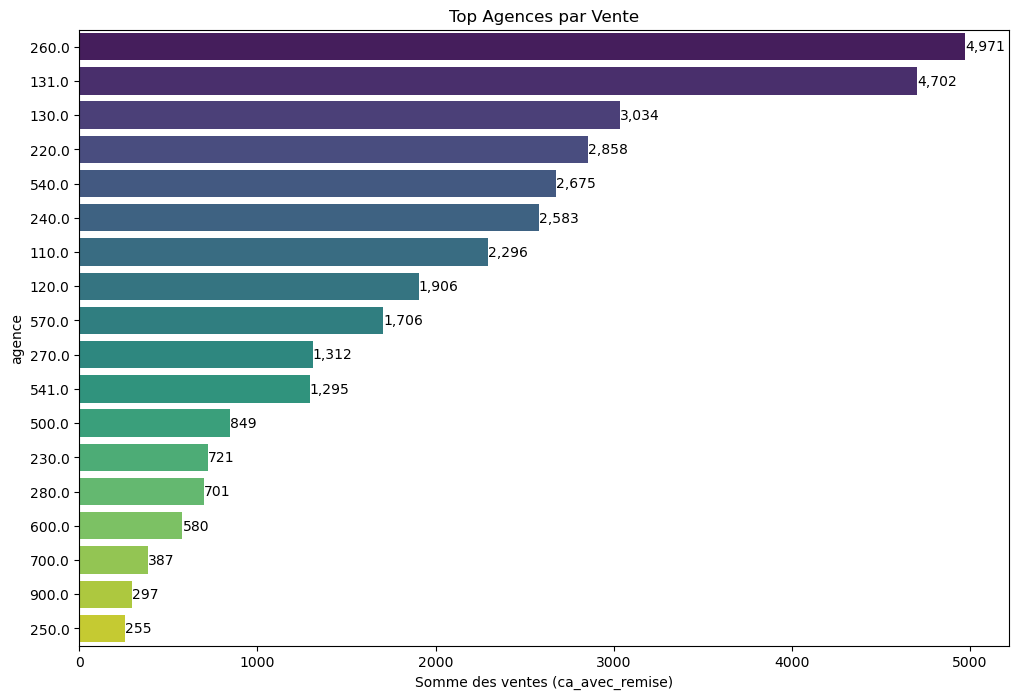

In [30]:
agence_sales = df_d.groupby('agence')['ca_avec_remise'].count().reset_index()
agence_sales_sorted = agence_sales.sort_values(by='ca_avec_remise', ascending=False)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=agence_sales_sorted, x='ca_avec_remise', y='agence', palette='viridis')
for index, value in enumerate(agence_sales_sorted['ca_avec_remise']):
    bar_plot.text(value, index, f'{value:,.0f}', va='center')
plt.title('Top Agences par Vente')
plt.xlabel('Somme des ventes (ca_avec_remise)')
plt.ylabel('agence')
plt.show()

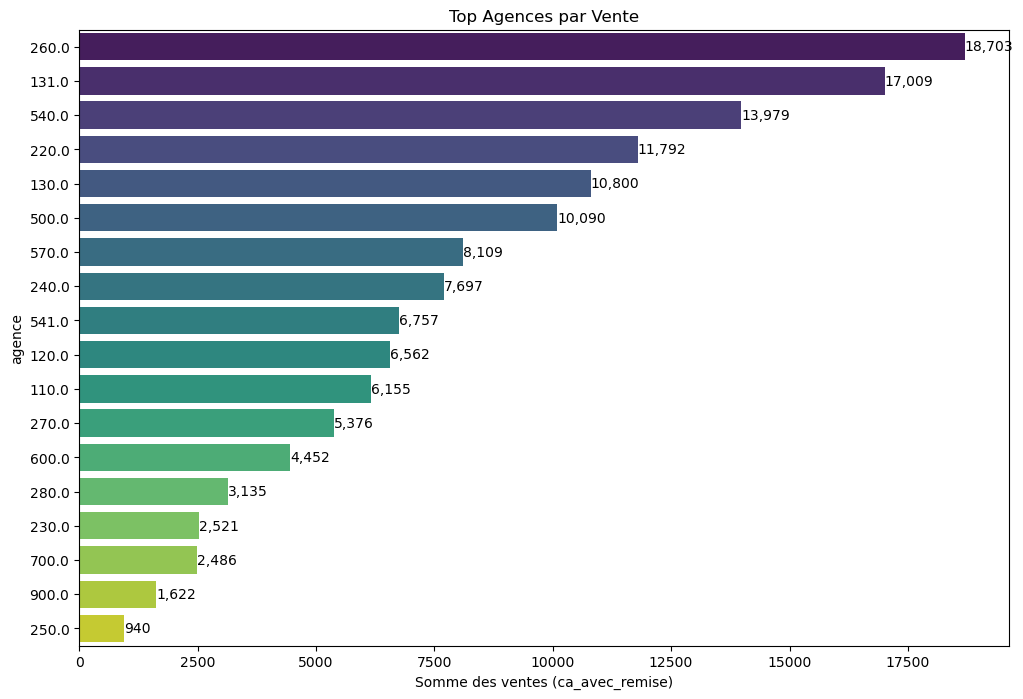

In [31]:
agence_sales = df.groupby('agence')['ca_avec_remise'].count().reset_index()
agence_sales_sorted = agence_sales.sort_values(by='ca_avec_remise', ascending=False)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=agence_sales_sorted, x='ca_avec_remise', y='agence', palette='viridis')
for index, value in enumerate(agence_sales_sorted['ca_avec_remise']):
    bar_plot.text(value, index, f'{value:,.0f}', va='center')
plt.title('Top Agences par Vente')
plt.xlabel('Somme des ventes (ca_avec_remise)')
plt.ylabel('agence')
plt.show()

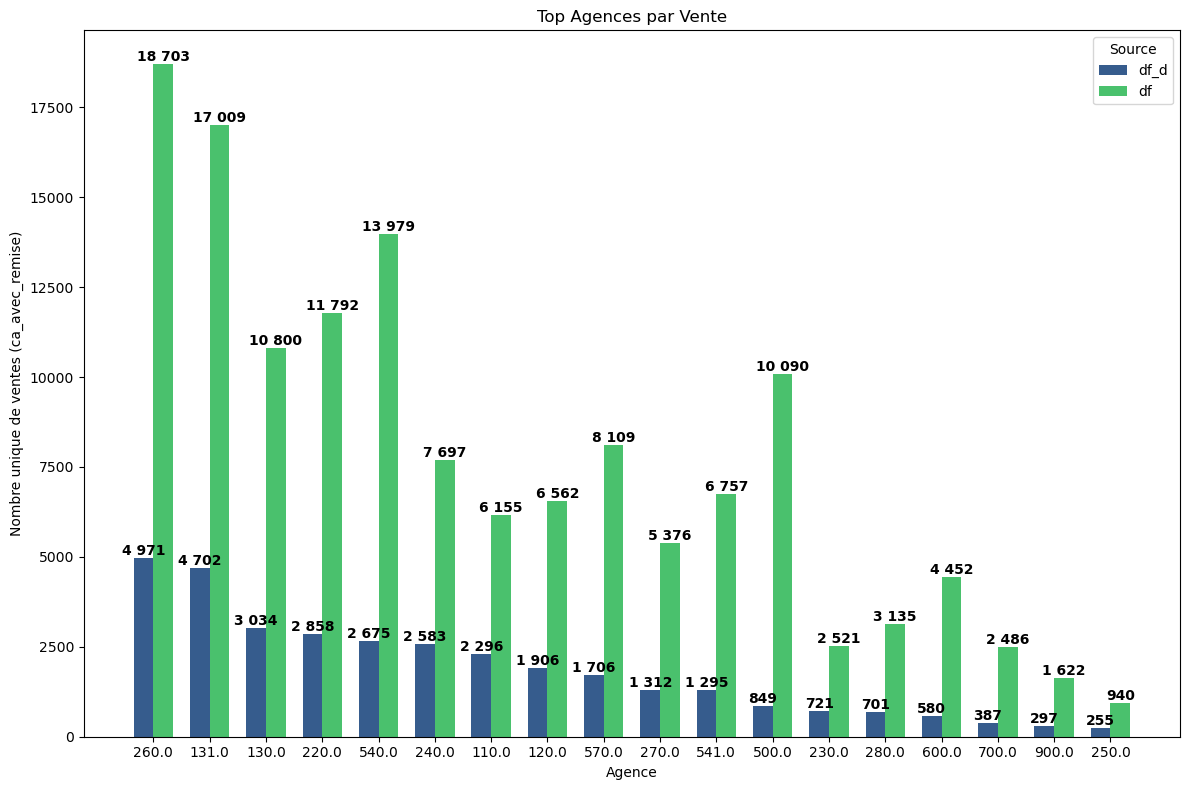

In [32]:
# Calculer le nombre de ventes pour chaque agence dans df_d
agence_sales_d = df_d.groupby('agence')['ca_avec_remise'].count().reset_index()
agence_sales_d.columns = ['agence', 'ca_avec_remise_d']

# Calculer le nombre de ventes pour chaque agence dans df
agence_sales = df.groupby('agence')['ca_avec_remise'].count().reset_index()
agence_sales.columns = ['agence', 'ca_avec_remise']

# Fusionner les deux DataFrames
agence_sales_combined = pd.merge(agence_sales_d, agence_sales, on='agence', how='outer').fillna(0)

# Trier les agences par le nombre de ventes
agence_sales_combined = agence_sales_combined.sort_values(by='ca_avec_remise_d', ascending=False)

# Créer le graphique en barres groupées
plt.figure(figsize=(12, 8))
bar_width = 0.35
positions = range(len(agence_sales_combined['agence']))

# Tracer les barres pour df_d
bar1 = plt.bar(positions, agence_sales_combined['ca_avec_remise_d'], width=bar_width, label='df_d', color=sns.color_palette("viridis")[1])

# Tracer les barres pour df
bar2 = plt.bar([p + bar_width for p in positions], agence_sales_combined['ca_avec_remise'], width=bar_width, label='df', color=sns.color_palette("viridis")[4])

# Ajouter les valeurs sur chaque barre pour df_d
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajouter les valeurs sur chaque barre pour df
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Définir les étiquettes des axes et le titre
plt.xlabel('Agence')
plt.ylabel('Nombre unique de ventes (ca_avec_remise)')
plt.title('Top Agences par Vente')

# Définir les positions et les étiquettes des agences sur l'axe des x
plt.xticks([p + bar_width/2 for p in positions], agence_sales_combined['agence'])

# Ajouter une légende
plt.legend(title='Source')

# Afficher le graphique
plt.tight_layout()
plt.show()

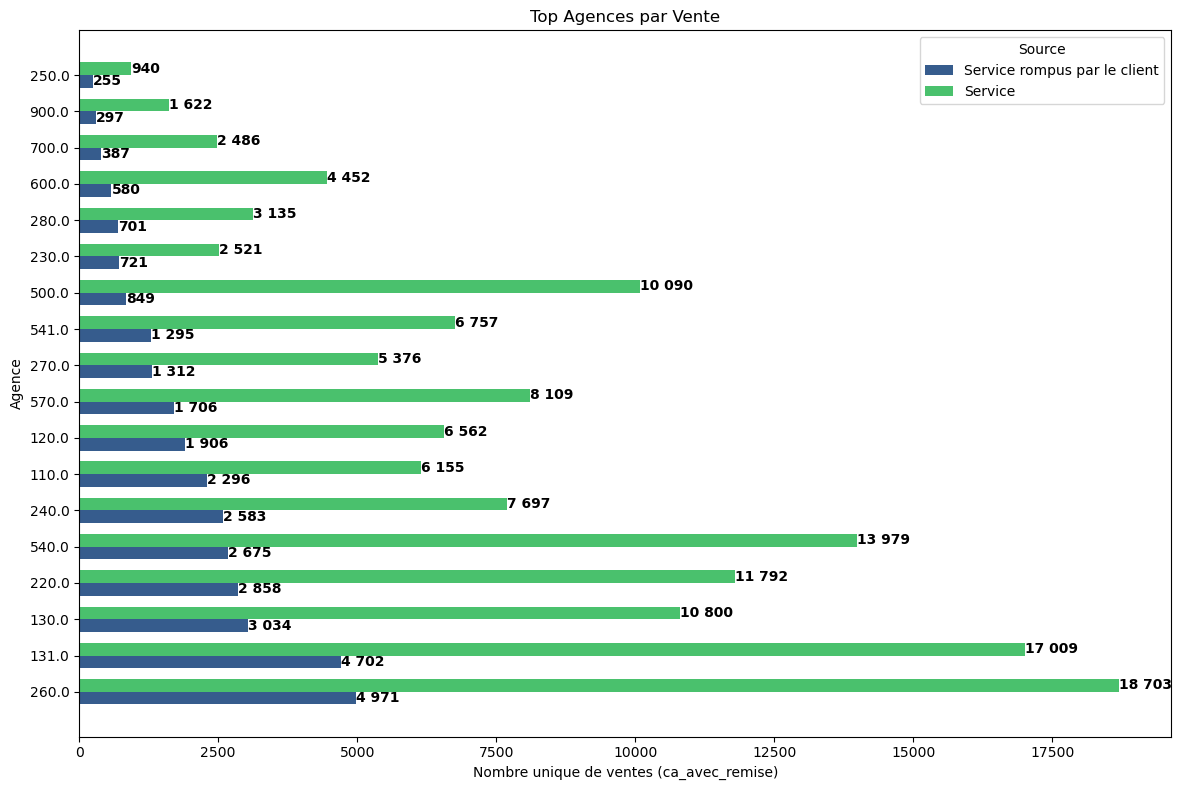

In [33]:
# Calculer le nombre de ventes pour chaque agence dans df_d
agence_sales_d = df_d.groupby('agence')['ca_avec_remise'].count().reset_index()
agence_sales_d.columns = ['agence', 'ca_avec_remise_d']

# Calculer le nombre de ventes pour chaque agence dans df
agence_sales = df.groupby('agence')['ca_avec_remise'].count().reset_index()
agence_sales.columns = ['agence', 'ca_avec_remise']

# Fusionner les deux DataFrames
agence_sales_combined = pd.merge(agence_sales_d, agence_sales, on='agence', how='outer').fillna(0)

# Trier les agences par le nombre de ventes
agence_sales_combined = agence_sales_combined.sort_values(by='ca_avec_remise_d', ascending=False)

# Créer le graphique en barres horizontales groupées
plt.figure(figsize=(12, 8))
bar_height = 0.35
positions = range(len(agence_sales_combined['agence']))

# Tracer les barres pour df_d
bar1 = plt.barh(positions, agence_sales_combined['ca_avec_remise_d'], height=bar_height, label='Service rompus par le client', color=sns.color_palette("viridis")[1])

# Tracer les barres pour df
bar2 = plt.barh([p + bar_height for p in positions], agence_sales_combined['ca_avec_remise'], height=bar_height, label='Service', color=sns.color_palette("viridis")[4])

# Ajouter les valeurs sur chaque barre pour df_d
for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.0, f'{int(width):,}'.replace(',', ' '), ha='left', va='center', fontsize=10, fontweight='bold')

# Ajouter les valeurs sur chaque barre pour df
for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.0, f'{int(width):,}'.replace(',', ' '), ha='left', va='center', fontsize=10, fontweight='bold')

# Définir les étiquettes des axes et le titre
plt.ylabel('Agence')
plt.xlabel('Nombre unique de ventes (ca_avec_remise)')
plt.title('Top Agences par Vente')

# Définir les positions et les étiquettes des agences sur l'axe des y
plt.yticks([p + bar_height/2 for p in positions], agence_sales_combined['agence'])

# Ajouter une légende
plt.legend(title='Source')

# Afficher le graphique
plt.tight_layout()
plt.show()

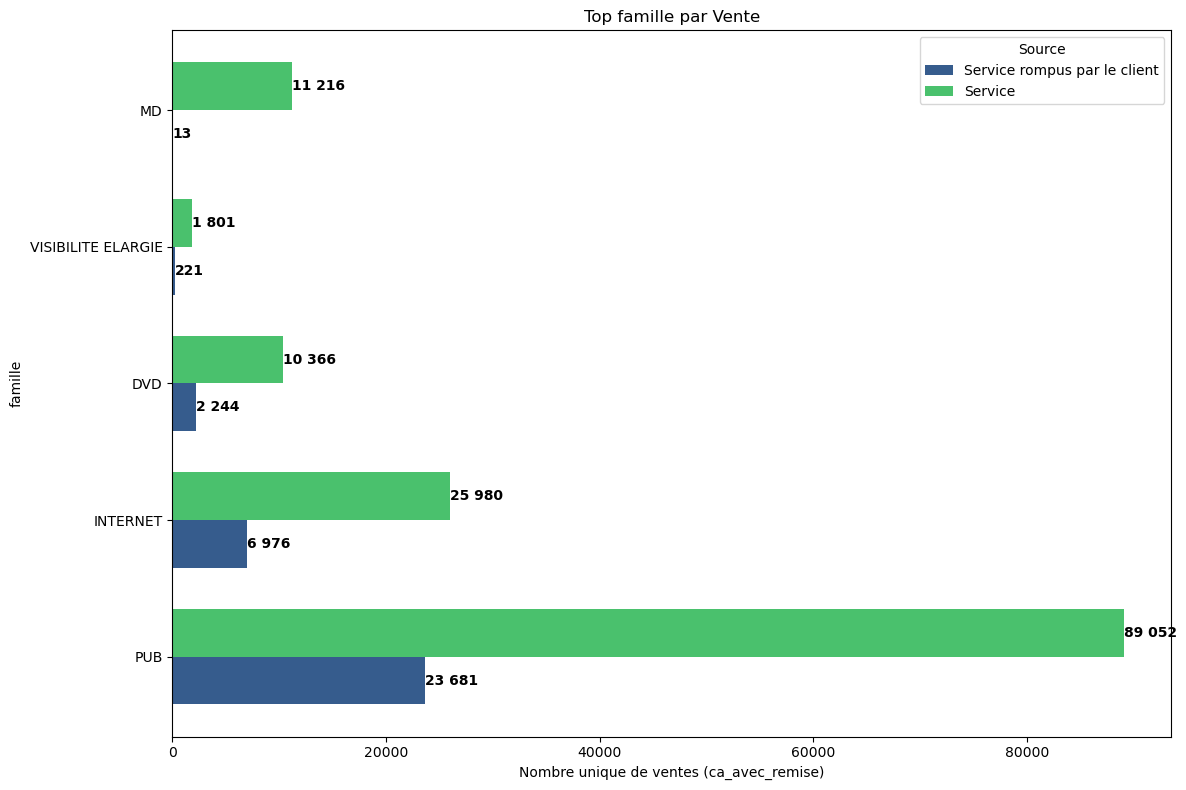

In [34]:
# Calculer le nombre de ventes pour chaque agence dans df_d
agence_sales_d = df_d.groupby('famille')['ca_avec_remise'].count().reset_index()
agence_sales_d.columns = ['famille', 'ca_avec_remise_d']

# Calculer le nombre de ventes pour chaque agence dans df
agence_sales = df.groupby('famille')['ca_avec_remise'].count().reset_index()
agence_sales.columns = ['famille', 'ca_avec_remise']

# Fusionner les deux DataFrames
agence_sales_combined = pd.merge(agence_sales_d, agence_sales, on='famille', how='outer').fillna(0)

# Trier les agences par le nombre de ventes
agence_sales_combined = agence_sales_combined.sort_values(by='ca_avec_remise_d', ascending=False)

# Créer le graphique en barres horizontales groupées
plt.figure(figsize=(12, 8))
bar_height = 0.35
positions = range(len(agence_sales_combined['famille']))

# Tracer les barres pour df_d
bar1 = plt.barh(positions, agence_sales_combined['ca_avec_remise_d'], height=bar_height, label='Service rompus par le client', color=sns.color_palette("viridis")[1])

# Tracer les barres pour df
bar2 = plt.barh([p + bar_height for p in positions], agence_sales_combined['ca_avec_remise'], height=bar_height, label='Service', color=sns.color_palette("viridis")[4])

# Ajouter les valeurs sur chaque barre pour df_d
for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.0, f'{int(width):,}'.replace(',', ' '), ha='left', va='center', fontsize=10, fontweight='bold')

# Ajouter les valeurs sur chaque barre pour df
for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.0, f'{int(width):,}'.replace(',', ' '), ha='left', va='center', fontsize=10, fontweight='bold')

# Définir les étiquettes des axes et le titre
plt.ylabel('famille')
plt.xlabel('Nombre unique de ventes (ca_avec_remise)')
plt.title('Top famille par Vente')

# Définir les positions et les étiquettes des agences sur l'axe des y
plt.yticks([p + bar_height/2 for p in positions], agence_sales_combined['famille'])

# Ajouter une légende
plt.legend(title='Source')

# Afficher le graphique
plt.tight_layout()
plt.show()

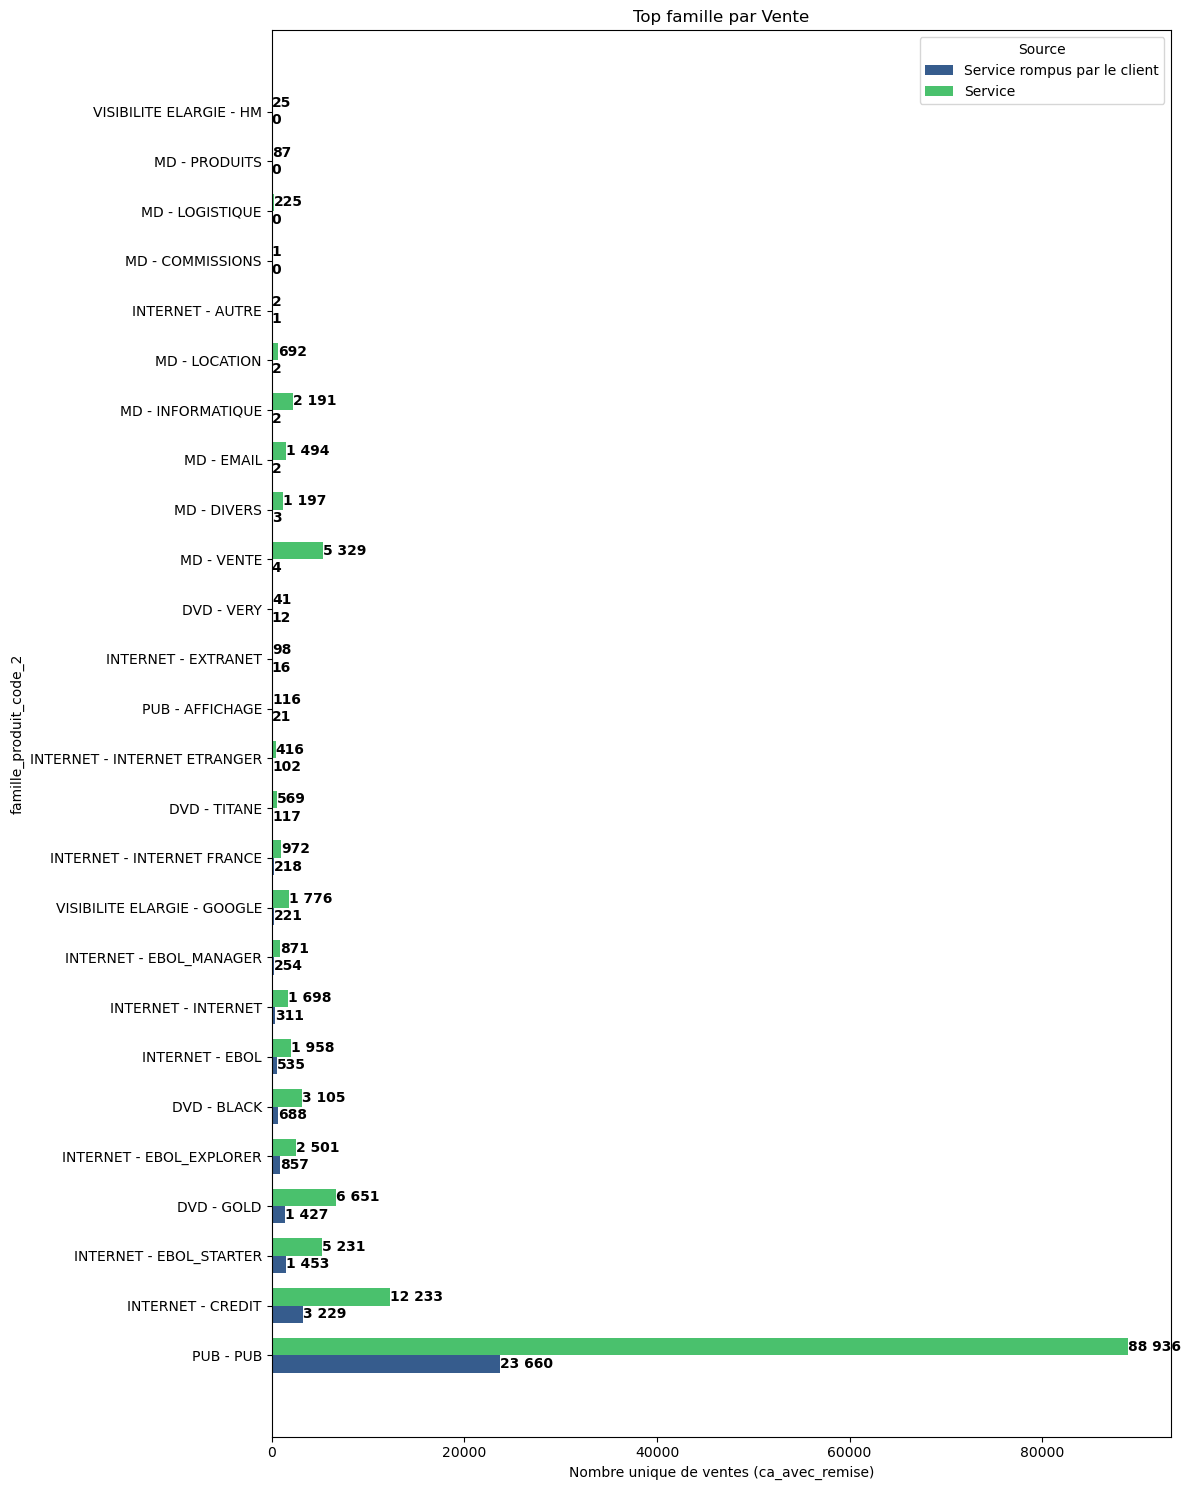

In [35]:
# Calculer le nombre de ventes pour chaque agence dans df_d
agence_sales_d = df_d.groupby('famille_produit_code_2')['ca_avec_remise'].count().reset_index()
agence_sales_d.columns = ['famille_produit_code_2', 'ca_avec_remise_d']

# Calculer le nombre de ventes pour chaque agence dans df
agence_sales = df.groupby('famille_produit_code_2')['ca_avec_remise'].count().reset_index()
agence_sales.columns = ['famille_produit_code_2', 'ca_avec_remise']

# Fusionner les deux DataFrames
agence_sales_combined = pd.merge(agence_sales_d, agence_sales, on='famille_produit_code_2', how='outer').fillna(0)

# Trier les agences par le nombre de ventes
agence_sales_combined = agence_sales_combined.sort_values(by='ca_avec_remise_d', ascending=False)

# Créer le graphique en barres horizontales groupées
plt.figure(figsize=(12, 15))
bar_height = 0.35
positions = range(len(agence_sales_combined['famille_produit_code_2']))

# Tracer les barres pour df_d
bar1 = plt.barh(positions, agence_sales_combined['ca_avec_remise_d'], height=bar_height, label='Service rompus par le client', color=sns.color_palette("viridis")[1])

# Tracer les barres pour df
bar2 = plt.barh([p + bar_height for p in positions], agence_sales_combined['ca_avec_remise'], height=bar_height, label='Service', color=sns.color_palette("viridis")[4])

# Ajouter les valeurs sur chaque barre pour df_d
for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.0, f'{int(width):,}'.replace(',', ' '), ha='left', va='center', fontsize=10, fontweight='bold')

# Ajouter les valeurs sur chaque barre pour df
for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.0, f'{int(width):,}'.replace(',', ' '), ha='left', va='center', fontsize=10, fontweight='bold')

# Définir les étiquettes des axes et le titre
plt.ylabel('famille_produit_code_2')
plt.xlabel('Nombre unique de ventes (ca_avec_remise)')
plt.title('Top famille par Vente')

# Définir les positions et les étiquettes des agences sur l'axe des y
plt.yticks([p + bar_height/2 for p in positions], agence_sales_combined['famille_produit_code_2'])

# Ajouter une légende
plt.legend(title='Source')

# Afficher le graphique
plt.tight_layout()
plt.show()

## APPROFONDIS

In [36]:

 df['isRNT'] = df['type_de_contrat'].apply(lambda x: 1 if x == 'RNT' else 0)

In [37]:
import pandas as pd
import scipy.stats as stats
import numpy as np

def cramers_v(contingency_table):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt((chi2 / n) / min_dim)

def point_biserial_correlation(df, target, numeric_var):
    """Calculate the point-biserial correlation between a binary target and a numeric variable."""
    return stats.pointbiserialr(df[target], df[numeric_var])[0]

def categorical_target_correlation(df, target, categorical_vars, numeric_vars):
 
    results = []

    # Categorical variables
    for var in categorical_vars:
        contingency_table = pd.crosstab(df[target], df[var])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        cramers_v_stat = cramers_v(contingency_table)
        
        results.append({
            'Variable': var,
            'Type': 'Categorical',
            'Chi2': chi2,
            'p-value': p,
            'Cramér\'s V': cramers_v_stat,
            'Point-Biserial Correlation': None
        })
    
    # Numeric variables
    for var in numeric_vars:
        correlation = point_biserial_correlation(df, target, var)
        
        results.append({
            'Variable': var,
            'Type': 'Numeric',
            'Chi2': None,
            'p-value': None,
            'Cramér\'s V': None,
            'Point-Biserial Correlation': correlation
        })
    
    return pd.DataFrame(results)

In [38]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['quantite_de_l\'article'])
df_copy = df_copy.dropna(subset=['valeur_de_l\'article'])
df_copy = df_copy.dropna(subset=['valeur_du_contrat'])
df_copy = df_copy.dropna(subset=['montant_du_panier_annuel_du_client'])
df_copy = df_copy.dropna(subset=['agence'])

categorical_vars = ['famille', 'produit_code_2', 'duree_produit', 'dans_un_pack', 'order_tran_codes_3', 'quantite_de_l\'article', 'agence', 'vendeur' ]
numeric_vars = ['quantite_de_l\'article', 'valeur_de_l\'article', 'valeur_du_contrat',  'montant_du_panier_annuel_du_client', ]

# Calcul de la corrélation
correlation_results = categorical_target_correlation(df_copy, 'isRNT', categorical_vars, numeric_vars)
print(correlation_results)

                              Variable         Type           Chi2  \
0                              famille  Categorical   13936.748929   
1                       produit_code_2  Categorical   16445.637020   
2                        duree_produit  Categorical    1596.662766   
3                         dans_un_pack  Categorical     583.571027   
4                   order_tran_codes_3  Categorical  138173.000000   
5                quantite_de_l'article  Categorical   18106.901893   
6                               agence  Categorical   42193.272715   
7                              vendeur  Categorical   55721.556638   
8                quantite_de_l'article      Numeric            NaN   
9                  valeur_de_l'article      Numeric            NaN   
10                   valeur_du_contrat      Numeric            NaN   
11  montant_du_panier_annuel_du_client      Numeric            NaN   

          p-value  Cramér's V  Point-Biserial Correlation  
0    0.000000e+00    0.317592

#### Conclusion
Les variables catégorielles telles que **famille, produit_code_2, quantite_de_l'article, agence, et vendeur** montrent des associations significatives avec la variable cible, avec des valeurs de Cramér's V indiquant des associations faibles à modérées. Les variables numériques montrent des corrélations très faibles avec la variable cible. 

In [39]:
# Les colonnes pour lesquelles nous voulons calculer le pourcentage de type de contrat "RNT"
columns = ['famille', 'produit_code_2']

# Dictionnaire pour stocker les résultats
percentages = {}

# Boucle sur chaque colonne
for col in columns:
    # Calcul du pourcentage de chaque modalité ayant le type de contrat "RNT"
    rnt_percentage = df[df['type_de_contrat'] == 'RNT'].groupby(col).size() / df.groupby(col).size() * 100
    rnt_percentage = rnt_percentage.reset_index()
    rnt_percentage.columns = [col, 'pourcentage_rnt']
    percentages[col] = rnt_percentage

# Affichage des résultats
for col in columns:
    print(f"Pourcentage des modalités dans la colonne '{col}' ayant le type de contrat 'RNT':")
    print(percentages[col])
    print("\n")


Pourcentage des modalités dans la colonne 'famille' ayant le type de contrat 'RNT':
              famille  pourcentage_rnt
0                 DVD        90.034729
1            INTERNET        72.474981
2                  MD        33.880171
3                 PUB        81.038045
4  VISIBILITE ELARGIE        56.024431


Pourcentage des modalités dans la colonne 'produit_code_2' ayant le type de contrat 'RNT':
       produit_code_2  pourcentage_rnt
0           AFFICHAGE        43.103448
1               AUTRE       100.000000
2               BLACK        89.887279
3         COMMISSIONS              NaN
4              CREDIT        72.181803
5              DIVERS        40.350877
6                EBOL        47.906027
7       EBOL_EXPLORER        63.334666
8        EBOL_MANAGER        85.419059
9        EBOL_STARTER        68.896960
10              EMAIL        40.227577
11           EXTRANET       100.000000
12               GOLD        90.693129
13             GOOGLE        56.193694
14  

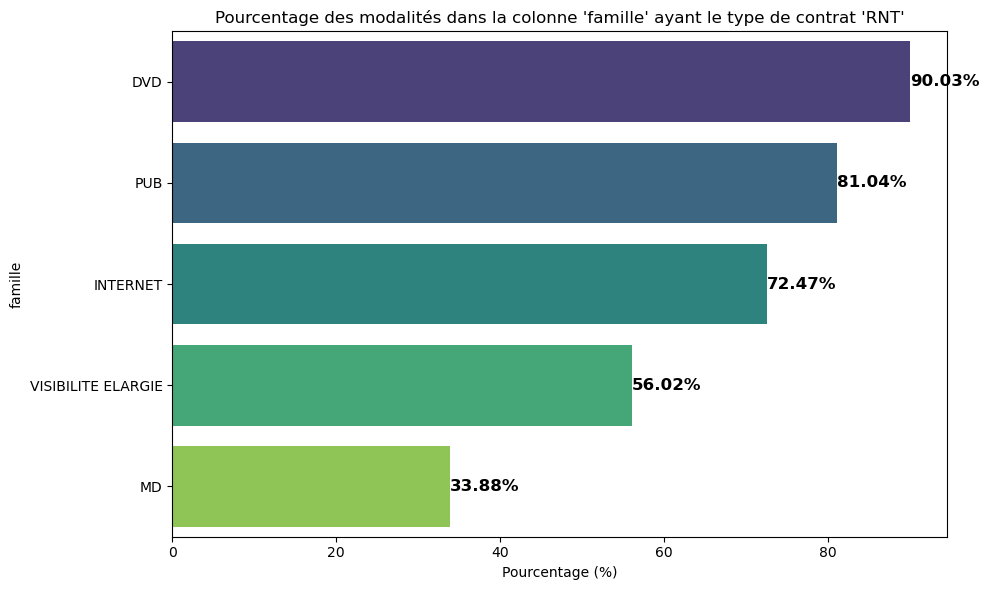

posx and posy should be finite values
posx and posy should be finite values


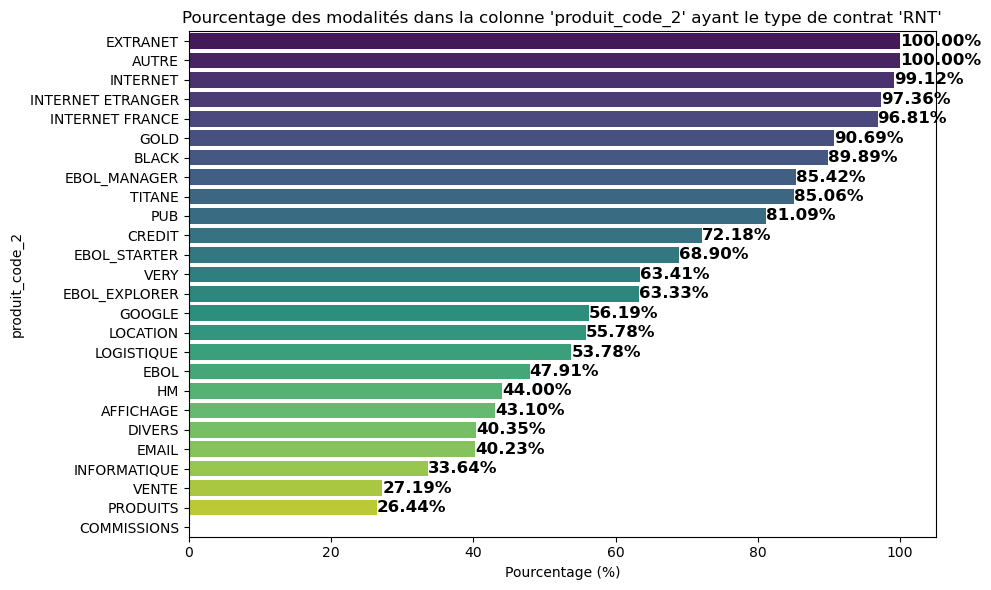

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Les colonnes pour lesquelles nous voulons calculer le pourcentage de type de contrat "RNT"
columns = ['famille', 'produit_code_2']

# Dictionnaire pour stocker les résultats
percentages = {}

# Boucle sur chaque colonne
for col in columns:
    # Calcul du pourcentage de chaque modalité ayant le type de contrat "RNT"
    rnt_percentage = df[df['type_de_contrat'] == 'RNT'].groupby(col).size() / df.groupby(col).size() * 100
    rnt_percentage = rnt_percentage.reset_index()
    rnt_percentage.columns = [col, 'pourcentage_rnt']
    rnt_percentage = rnt_percentage.sort_values('pourcentage_rnt', ascending=False)  # Trie par pourcentage décroissant
    percentages[col] = rnt_percentage

# Création des graphiques
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=percentages[col], y=col, x='pourcentage_rnt', palette='viridis')
    plt.title(f"Pourcentage des modalités dans la colonne '{col}' ayant le type de contrat 'RNT'")
    plt.xlabel('Pourcentage (%)')
    plt.ylabel(col)
    # Ajouter les nombres devant chaque barre
    for index, value in enumerate(percentages[col]['pourcentage_rnt']):
        plt.text(value, index, f'{value:.2f}%', va='center', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
